<center>
    <h1>Breast Cancer Detection</h1>
    <h2>ITE2006 - Data Mining Techniques - J Component</h2>
</center>
<p>
    <p><b>Group Members:</b></p>
    <p>
        <ul>
            <li>19BIT0346 - Aashish Bansal</li>
            <li>19BIT0260 - Akshat Jain</li>
        </ul>
    </p>
</p>


# About the Dataset
<p>
Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. In the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].
</p>
<p>
Link to UCI Machine Learning Repository for Dataset: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29
</p>
<p>
    <p>Attribute Information:</p>
    <p>
        <ol>
            <li>ID number</li>
            <li>Diagnosis (M = malignant, B = benign)</li>
            <li><p>Ten real-valued features are computed for each cell nucleus:</p>
            <p>
                <ol type="a">
                    <li>radius (mean of distances from center to points on the perimeter)</li>
                    <li>texture (standard deviation of gray-scale values)</li>
                    <li>perimeter</li>
                    <li>area</li>
                    <li>smoothness (local variation in radius lengths)</li>
                    <li>compactness (perimeter^2 / area - 1.0)</li>
                    <li>concavity (severity of concave portions of the contour)</li>
                    <li>concave points (number of concave portions of the contour)</li>
                    <li>symmetry</li>
                    <li>fractal dimension ("coastline approximation" - 1)</li>
                </ol>
            </p>
            </li>
            <!-- <li></li> -->
        </ol>
    </p>
</p>
<p>
The mean, standard error and "worst" or largest (mean of the three
largest values) of these features were computed for each image,
resulting in 30 features. For instance, field 3 is Mean Radius, field
13 is Radius SE, field 23 is Worst Radius.
</p>
<p>
All feature values are recoded with four significant digits.
</p>
<p>
    <b>Missing attribute values:</b> None
</p>
<p>
    <p><b>Class distribution:</b></p>
    <p>
        <ul>
            <li>Benign - 357</li>
            <li>Malignant - 212</li>
        </ul>
    </p>
</p>

# Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import warnings
import os 
warnings.filterwarnings("ignore")
import datetime

# Loading the Dataset

## Reading the CSV File

In [2]:
df=pd.read_csv('breast_cancer.csv')

# Display of Records

In [3]:
df.head()      #displaying the head of dataset

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33           184.60      2019.0            0.1622   
1  ...          23.41           158.80      1956.0            0.1238   
2  ...          25.53           152.50      1709.0            0.1444   
3  ...          26.50            98.87       567.7            0.2098   
4  ...          16.67           152.20      1575.0            0.1374   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN  

[5 rows x 33 columns]

## Shape of the Dataset

In [4]:
df.shape       

(569, 33)

## Columns in the Dataset

In [5]:
data_columns = df.columns     #displaying the columns of dataset

In [6]:
data_columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

## Checking the meta information about the Data

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [8]:
df.describe(percentiles=[0.1,0.25,0.45,0.55,0.75,0.95])      #description of dataset 

id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
10%    8.531554e+05    10.260000     14.078000       65.830000   321.600000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
45%    9.013102e+05    12.996000     18.342000       84.066000   518.280000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
55%    9.115064e+05    13.694000     19.362000       88.370000   578.060000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
95%    9.042446e+07    20.576000     27.150000      135.820000  1309.800000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
10%           0.079654          0.049700        0.013686             0.011158   
25%           0.086370          0.064920        0.029560             0.020310   
45%           0.094034          0.085074        0.052838             0.029998   
50%           0.095870          0.092630        0.061540             0.033500   
55%           0.097734          0.101740        0.071450             0.040196   
75%           0.105300          0.130400        0.130700             0.074000   
95%           0.118780          0.208700        0.243020             0.125740   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  ...  texture_worst  perimeter_worst   area_worst  \
count     569.000000  ...     569.000000       569.000000   569.000000   
mean        0.181162  ...      25.677223       107.261213   880.583128   
std         0.027414  ...       6.146258        33.602542   569.356993   
min         0.106000  ...      12.020000        50.410000   185.200000   
10%         0.149580  ...      17.800000        72.178000   384.720000   
25%         0.161900  ...      21.080000        84.110000   515.300000   
45%         0.175620  ...      24.632000        94.352000   633.620000   
50%         0.179200  ...      25.410000        97.660000   686.500000   
55%         0.181840  ...      26.008000       101.200000   726.860000   
75%         0.195700  ...      29.720000       125.400000  1084.000000   
95%         0.230720  ...      36.300000       171.640000  2009.600000   
max         0.304000  ...      49.540000       251.200000  4254.000000   

       smoothness_worst  compactness_worst  concavity_worst  \
count        569.000000         569.000000       569.000000   
mean           0.132369           0.254265         0.272188   
std            0.022832           0.157336         0.208624   
min            0.071170           0.027290         0.000000   
10%            0.102960           0.093676         0.045652   
25%            0.116600           0.147200         0.114500   
45%            0.128900           0.199100         0.193380   
50%            0.131300           0.211900         0.226700   
55%            0.134700           0.231260         0.256000   
75%            0.146000           0.339100         0.382900   
95%            0.171840           0.564120         0.682380   
max            0.222600           1.058000         1.252000   

       concave points_worst  symmetry_worst  fractal_dimension_worst  \
count            569.000000      569.000000               569.000000   
mean    

# Visualizing the Data

## Radius Mean Vs. Perimeter Mean

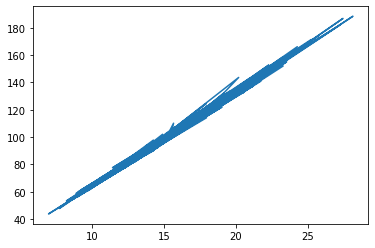

In [9]:
plt.plot(df['radius_mean'], df['perimeter_mean'])
plt.show()

## Visualizing the Percentage Missing Value from Dataset

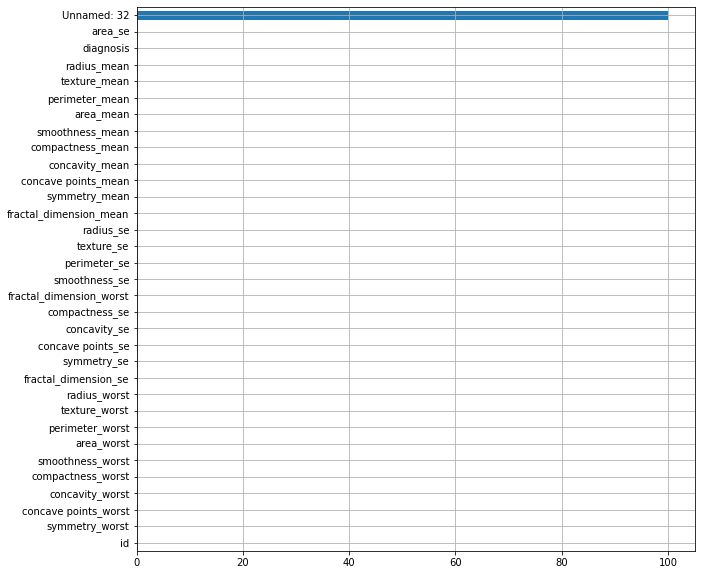

In [10]:
((df.isnull().sum()/len(df))*100).sort_values(ascending=True).plot(kind='barh',figsize=(10,10))
plt.grid(b=True, which='both')

## Count of Cancer Type

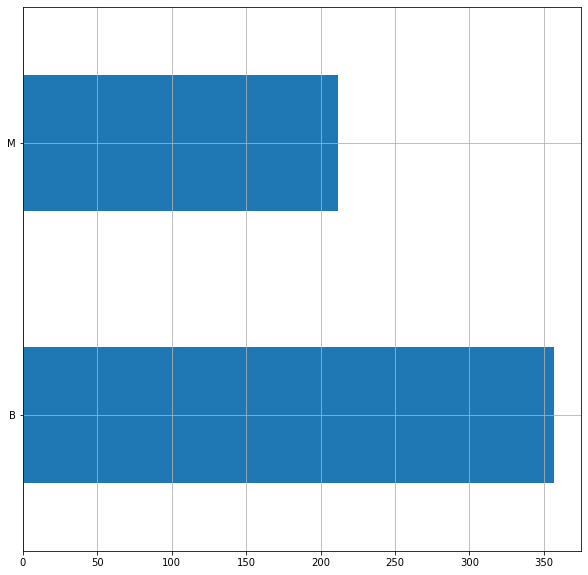

In [11]:
df['diagnosis'].value_counts().plot(kind='barh', figsize=(10,10))
plt.grid(b=True, which='both')

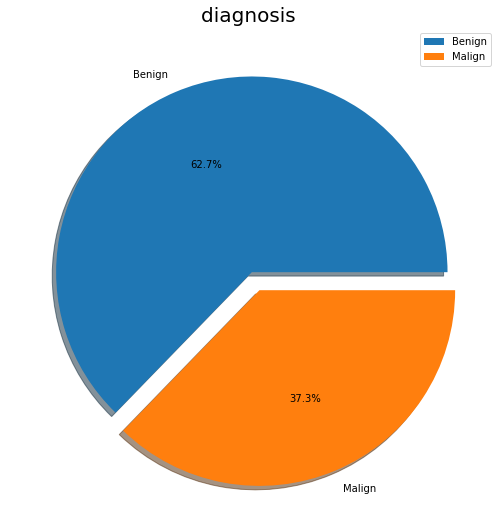

In [12]:
plt.rcParams['figure.figsize'] = (9, 9)
labels=['Benign','Malign']
plt.pie(df['diagnosis'].value_counts(), explode=(0,0.1), labels=labels,autopct='%1.1f%%', shadow=True)
plt.title('diagnosis ', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

# Exploratory Data Analysis

## Checking for Missing Values

In [13]:
#To find the missing value in dataset
for i in df.columns:
    null_rate=df[i].isnull().sum()/len(df)
    if null_rate>0:
        print("{}'s null rate {} %'".format(i, round(null_rate,2)))

Unnamed: 32's null rate 1.0 %'


In [14]:
df.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33           184.60      2019.0            0.1622   
1  ...          23.41           158.80      1956.0            0.1238   
2  ...          25.53           152.50      1709.0            0.1444   
3  ...          26.50            98.87       567.7            0.2098   
4  ...          16.67           152.20      1575.0            0.1374   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN  

[5 rows x 33 columns]

# Finding Correlations

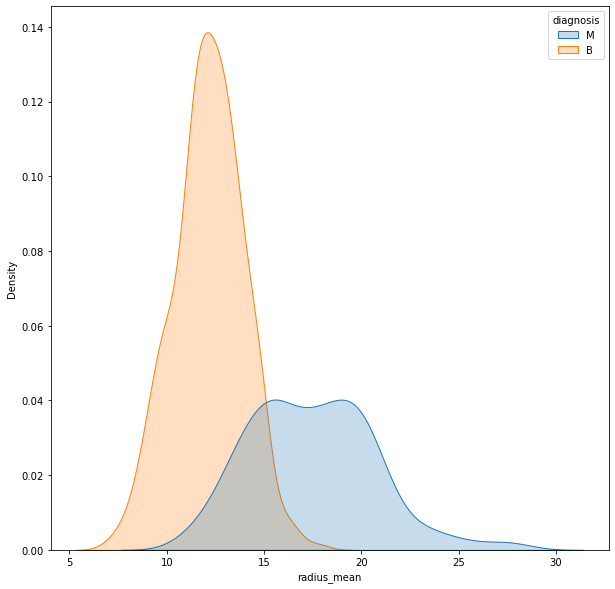

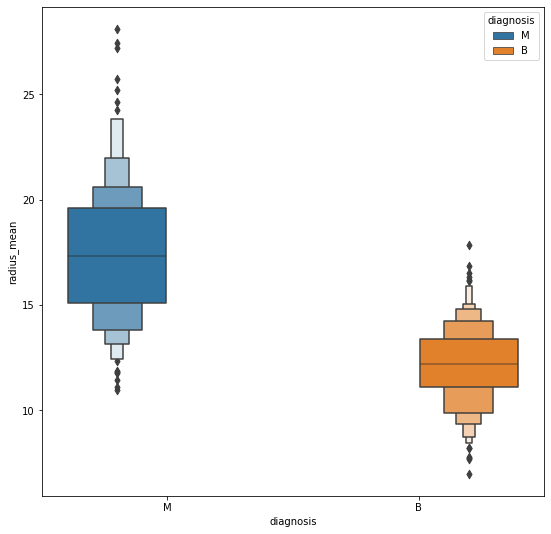

In [15]:
plt.figure(figsize=(10,10))
sns.kdeplot(df['radius_mean'], hue=df['diagnosis'],shade=True, legend=True)
plt.show()

sns.boxenplot(x=df['diagnosis'], y=df['radius_mean'], hue=df['diagnosis'])
plt.show()

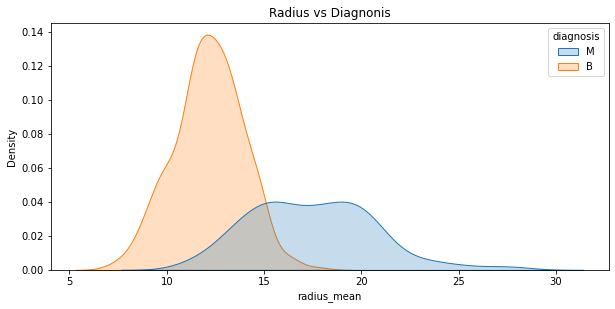

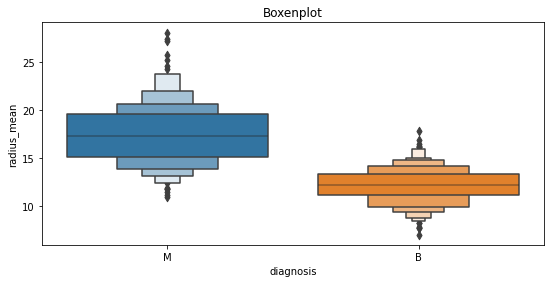

In [16]:
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
sns.kdeplot(x=df['radius_mean'],hue=df['diagnosis'], shade=True, vertical=False, kernel=str, gridsize=100, legend=True,
           shade_lowest=True,cbar=True)
plt.title("Radius vs Diagnonis")
#plt.xlabel("Counts")
plt.show()

plt.subplot(2,1,2)
sns.boxenplot(y=df['radius_mean'],x=df['diagnosis'])
plt.title("Boxenplot")
#plt.xlabel("Counts")
plt.show()

# Finding the Useful Features

<Figure size 720x720 with 0 Axes>

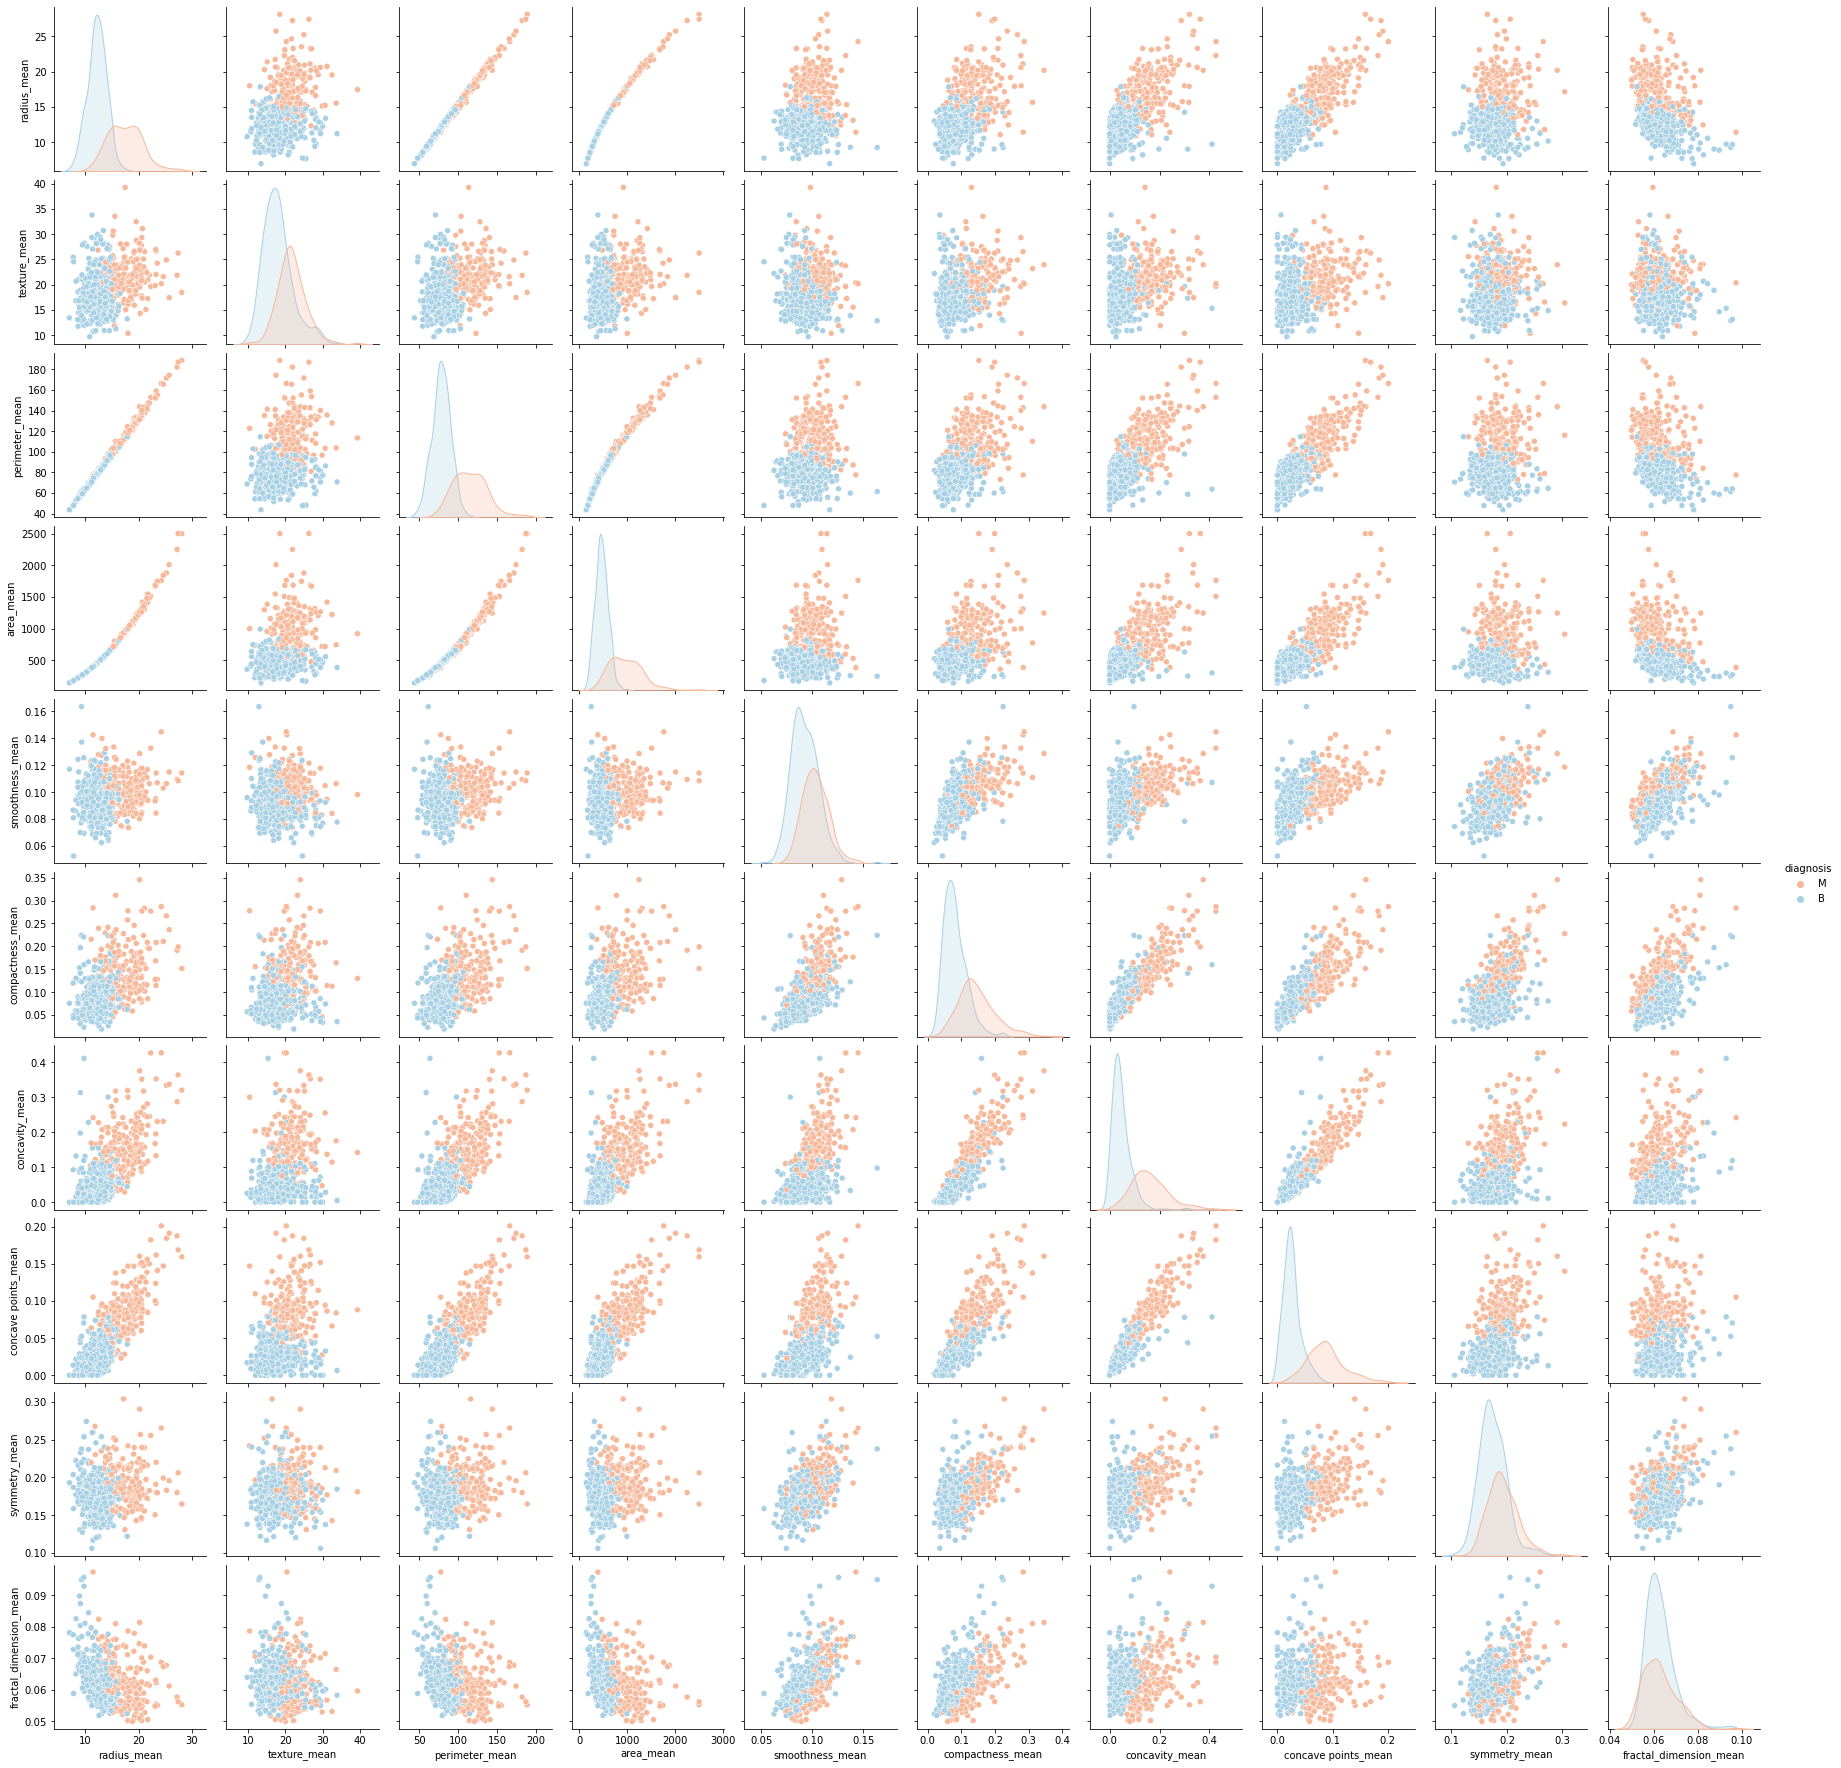

In [17]:
#Visualization
# it is important to see the counts of different type of cancer
#Pairplot helps to plot among the most useful feature
cols=['diagnosis','radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean','smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']
plt.figure(figsize=(10,10))
sns.pairplot(data=df[cols],hue='diagnosis', palette='RdBu')

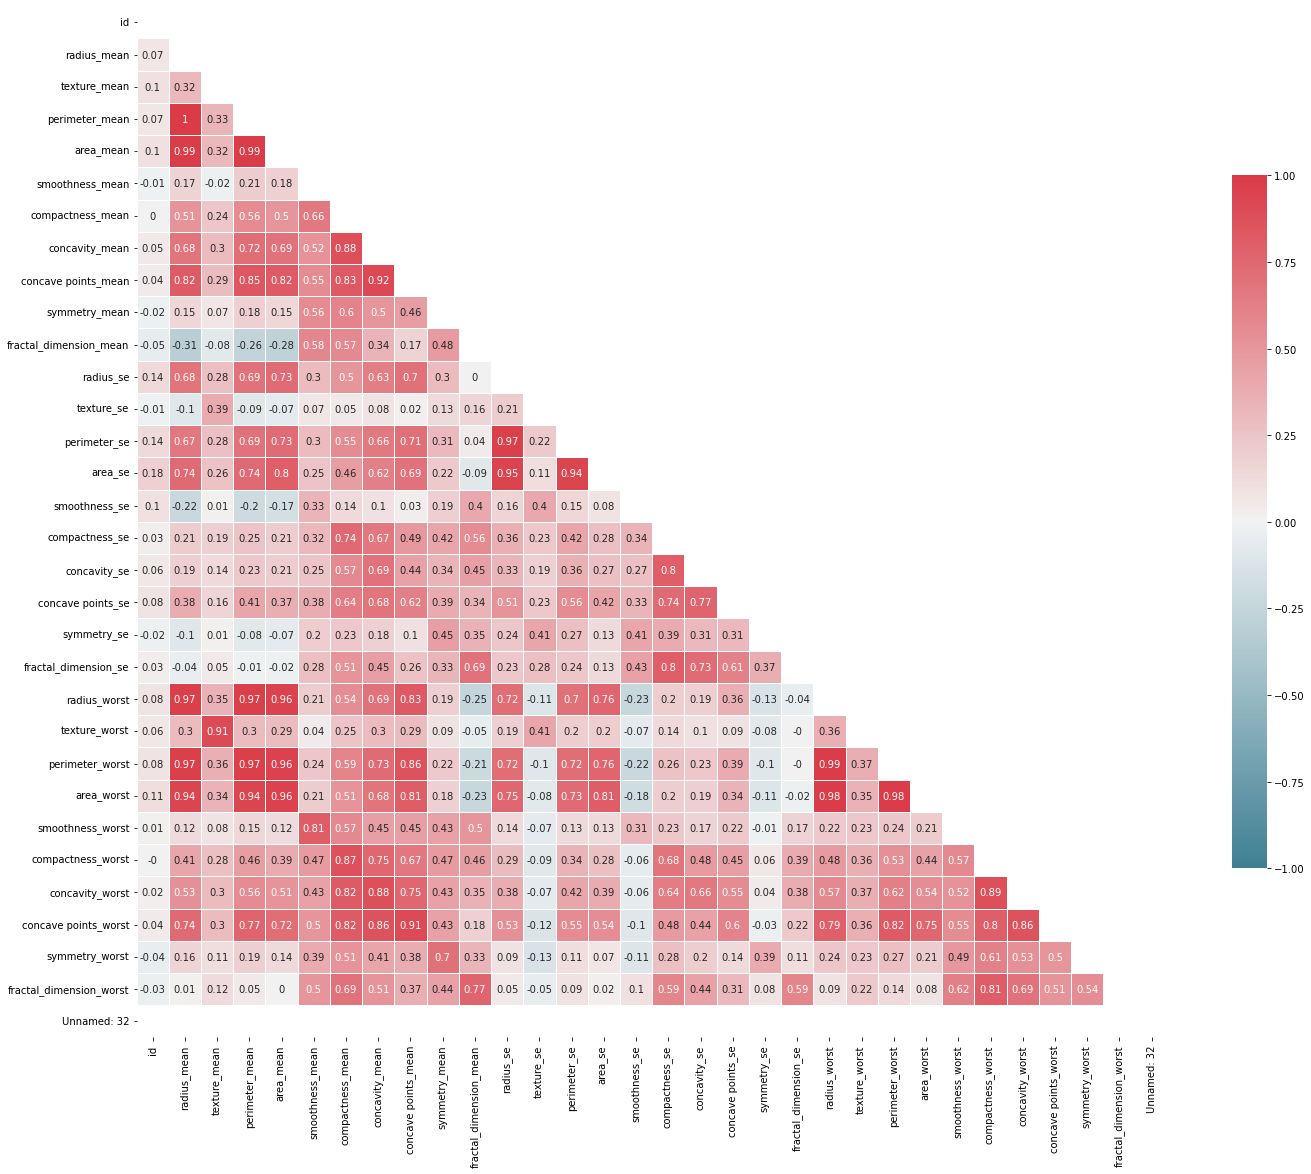

In [18]:
# Heatmap to find the most correlated features
#generate the corellation matrix 
# Generate and visualize the correlation matrix
corr = df.corr().round(2)

# Mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set figure size
f, ax = plt.subplots(figsize=(20, 20))

# Define custom colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.tight_layout()

# Dropping Less Important Features

In [19]:
#Dropping less important feature
#dropping all "worst" columns
cols = ['radius_worst', 
        'texture_worst', 
        'perimeter_worst', 
        'area_worst', 
        'smoothness_worst', 
        'compactness_worst', 
        'concavity_worst',
        'concave points_worst', 
        'symmetry_worst', 
        'fractal_dimension_worst']

df=df.drop(cols, axis=1)

In [20]:
# then, drop all columns related to the "perimeter" and "area" attributes
cols = ['perimeter_mean',
        'perimeter_se', 
        'area_mean', 
        'area_se']

df=df.drop(cols, axis=1)

In [21]:
# lastly, drop all columns related to the "concavity" and "concave points" attributes
cols = ['concavity_mean',
        'concavity_se', 
        'concave points_mean', 
        'concave points_se']
df = df.drop(cols, axis=1)

# Remaining Columns

In [22]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'smoothness_mean',
       'compactness_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'smoothness_se', 'compactness_se',
       'symmetry_se', 'fractal_dimension_se', 'Unnamed: 32'],
      dtype='object')

# Correlations of Remaining Features

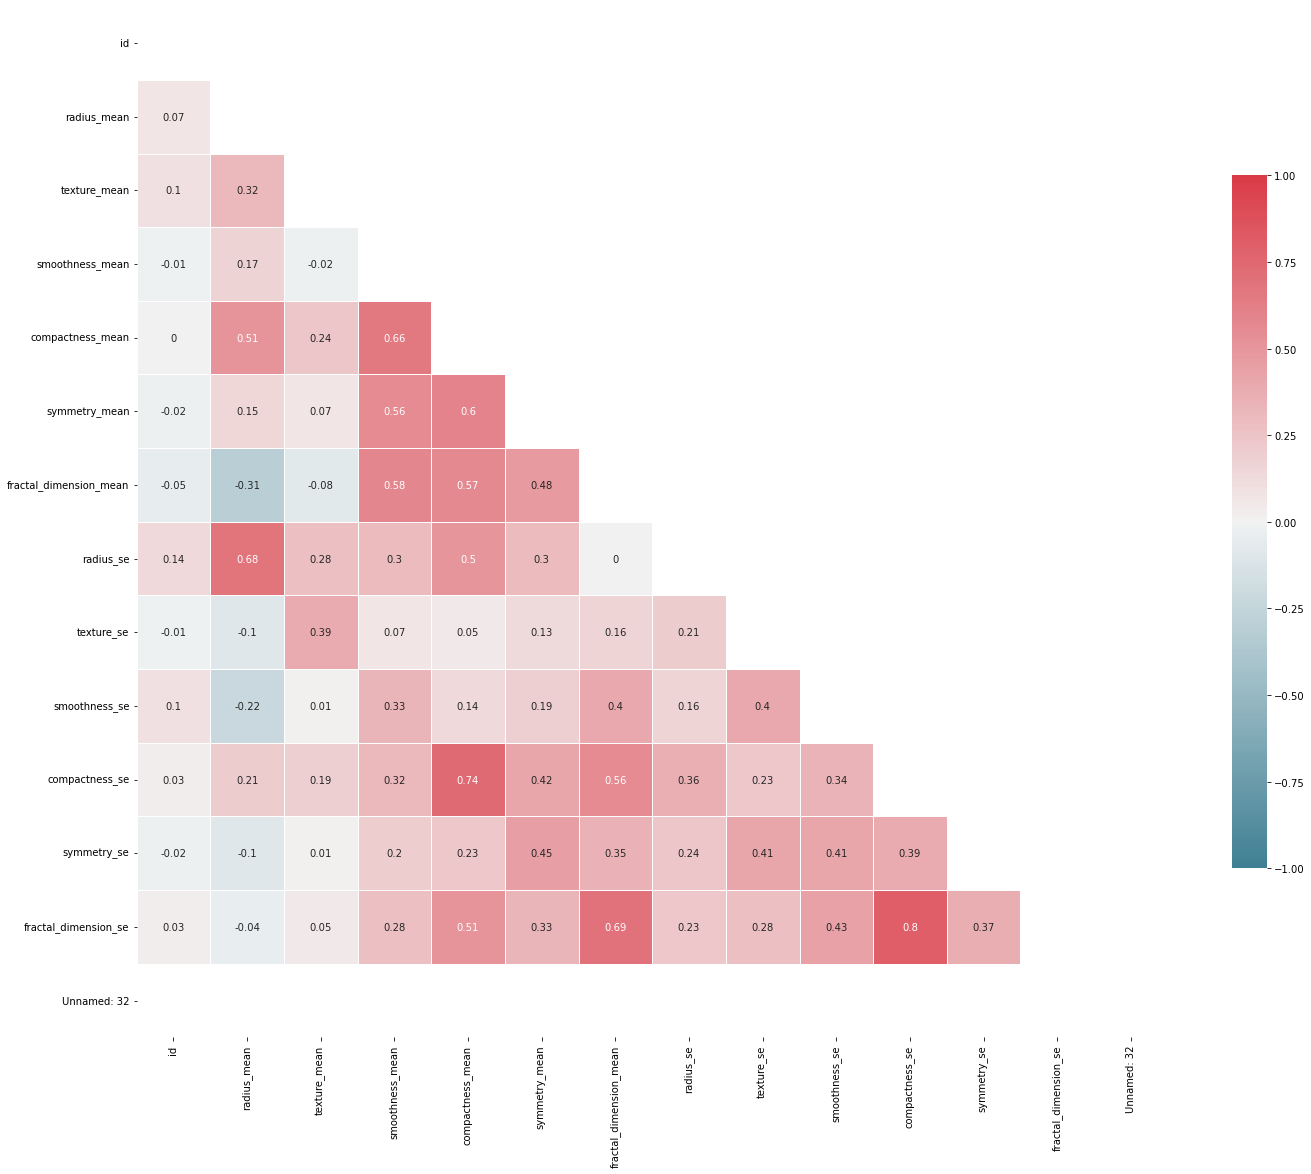

In [23]:
#Correlation Matrix for the most important features
# Generate and visualize the correlation matrix
corr = df.corr().round(2)

# Mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set figure size
f, ax = plt.subplots(figsize=(20, 20))

# Define custom colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.tight_layout()

In [24]:
data=pd.read_csv('breast_cancer.csv')
data.drop('Unnamed: 32', axis = 1, inplace = True)

# TRAINING AND TESTING DATA

In [25]:
# Getting Features
x = data.drop(columns = 'diagnosis')

# Getting Predicting Value
y = data['diagnosis']

In [26]:
print(x)
print(y)

           id  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302        17.99         10.38          122.80     1001.0   
1      842517        20.57         17.77          132.90     1326.0   
2    84300903        19.69         21.25          130.00     1203.0   
3    84348301        11.42         20.38           77.58      386.1   
4    84358402        20.29         14.34          135.10     1297.0   
..        ...          ...           ...             ...        ...   
564    926424        21.56         22.39          142.00     1479.0   
565    926682        20.13         28.25          131.20     1261.0   
566    926954        16.60         28.08          108.30      858.1   
567    927241        20.60         29.33          140.10     1265.0   
568     92751         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840           0.27760         0.30010              

In [27]:
#train_test_splitting of the dataset
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [28]:
print(len(x_train))

455


In [29]:
print(len(x_test))

114


In [30]:
print(len(y_train))

455


In [31]:
print(len(y_test))

114


# MODELS

# 1. Logistic Regression

In [32]:
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression()
reg.fit(x_train,y_train)                         

LogisticRegression()

In [33]:
y_pred=reg.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,r2_score
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print("Training Score: ",reg.score(x_train,y_train)*100)

              precision    recall  f1-score   support

           B       0.59      1.00      0.74        67
           M       0.00      0.00      0.00        47

    accuracy                           0.59       114
   macro avg       0.29      0.50      0.37       114
weighted avg       0.35      0.59      0.44       114

[[67  0]
 [47  0]]
Training Score:  63.73626373626373


In [34]:
data = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
data

Actual Predicted
512      M         B
457      B         B
439      B         B
298      B         B
37       B         B
..     ...       ...
213      M         B
519      B         B
432      M         B
516      M         B
500      B         B

[114 rows x 2 columns]

In [35]:
print(accuracy_score(y_test,y_pred)*100)

58.77192982456141


**So we get a accuracy score of 58.7 % using logistic regression**

In [36]:
y_test_array = np.asarray(y_test)
misclassified = np.where(y_test_array != reg.predict(x_test))
print(misclassified)

(array([  0,  15,  17,  18,  19,  20,  21,  24,  27,  29,  31,  33,  35,
        37,  39,  40,  42,  45,  49,  50,  51,  52,  59,  60,  61,  64,
        66,  67,  68,  71,  73,  74,  80,  81,  82,  84,  88,  89,  91,
        93,  96, 104, 106, 108, 109, 111, 112], dtype=int64),)


In [37]:
#make this example reproducible
np.random.seed(0)
#create DataFrame
misclassified_data=[]
for j in misclassified:
    d=x_train.iloc[j,0]
    misclassified_data.append(d)

In [38]:
len(misclassified_data[0])

47

In [39]:
#view DataFrame
misclassified_data

[338      897880
 550      923748
 185      874158
 306       89344
 208     8810158
 242      883852
 313      893988
 236    88299702
 76      8610629
 293      891703
 565      926682
 489      913535
 357      901028
 112       86409
 526    91813701
 206      879804
 437      909220
 392      903507
 441      909445
 137      868682
 230      881972
 7      84458202
 155     8711003
 186      874217
 101      862722
 153       87106
 30       853401
 531    91903901
 49       857156
 299      892399
 502       91505
 56       857637
 320      894604
 252      885429
 202      878796
 240    88350402
 261      888264
 339       89812
 276     8911230
 505      915276
 154     8711002
 262      888570
 229      881861
 171       87163
 454      911202
 158      871122
 415      905686
 Name: id, dtype: int64]

In [40]:
print(misclassified_data[0])
print(type(misclassified_data))

338      897880
550      923748
185      874158
306       89344
208     8810158
242      883852
313      893988
236    88299702
76      8610629
293      891703
565      926682
489      913535
357      901028
112       86409
526    91813701
206      879804
437      909220
392      903507
441      909445
137      868682
230      881972
7      84458202
155     8711003
186      874217
101      862722
153       87106
30       853401
531    91903901
49       857156
299      892399
502       91505
56       857637
320      894604
252      885429
202      878796
240    88350402
261      888264
339       89812
276     8911230
505      915276
154     8711002
262      888570
229      881861
171       87163
454      911202
158      871122
415      905686
Name: id, dtype: int64
<class 'list'>


In [41]:
df_new = []

In [42]:
# for j in misclassified_data[0]:
#     print(j)
#     print("========================")
#     #     for i in misclassified_data[0]:
#     df_new.append(df[df['id']==misclassified_data[0]])
#     print(df_new)
#     print("+++++++++++++++++++++++++++++++")
#     print("+++++++++++++++++++++++++++++++")
# #     df_new.append(df[df['id']==j])

In [43]:
# ORIGINAL WORKING
for j in misclassified_data[0]:
    print(j)
    print("========================")
for i in misclassified_data[0]:
    df_new.append(df[df['id']==i])
    print(df_new)
    print("+++++++++++++++++++++++++++++++")
    print("+++++++++++++++++++++++++++++++")
#     df_new.append(df[df['id']==j])

897880
923748
874158
89344
8810158
883852
893988
88299702
8610629
891703
926682
913535
901028
86409
91813701
879804
909220
903507
909445
868682
881972
84458202
8711003
874217
862722
87106
853401
91903901
857156
892399
91505
857637
894604
885429
878796
88350402
888264
89812
8911230
915276
8711002
888570
881861
87163
911202
871122
905686
[         id diagnosis  radius_mean  texture_mean  smoothness_mean  \
338  897880         B        10.05         17.53           0.1007   

     compactness_mean  symmetry_mean  fractal_dimension_mean  radius_se  \
338           0.07326          0.189                 0.06331     0.2619   

     texture_se  smoothness_se  compactness_se  symmetry_se  \
338       2.015       0.007803         0.01449        0.021   

     fractal_dimension_se  Unnamed: 32  
338              0.002778          NaN  ]
+++++++++++++++++++++++++++++++
+++++++++++++++++++++++++++++++
[         id diagnosis  radius_mean  texture_mean  smoothness_mean  \
338  897880         B      

[         id diagnosis  radius_mean  texture_mean  smoothness_mean  \
338  897880         B        10.05         17.53           0.1007   

     compactness_mean  symmetry_mean  fractal_dimension_mean  radius_se  \
338           0.07326          0.189                 0.06331     0.2619   

     texture_se  smoothness_se  compactness_se  symmetry_se  \
338       2.015       0.007803         0.01449        0.021   

     fractal_dimension_se  Unnamed: 32  
338              0.002778          NaN  ,          id diagnosis  radius_mean  texture_mean  smoothness_mean  \
550  923748         B        10.86         21.48          0.07431   

     compactness_mean  symmetry_mean  fractal_dimension_mean  radius_se  \
550           0.04227         0.1661                 0.05948     0.3163   

     texture_se  smoothness_se  compactness_se  symmetry_se  \
550       1.304       0.009579         0.01104      0.03004   

     fractal_dimension_se  Unnamed: 32  
550              0.002228          NaN  ,

+++++++++++++++++++++++++++++++
[         id diagnosis  radius_mean  texture_mean  smoothness_mean  \
338  897880         B        10.05         17.53           0.1007   

     compactness_mean  symmetry_mean  fractal_dimension_mean  radius_se  \
338           0.07326          0.189                 0.06331     0.2619   

     texture_se  smoothness_se  compactness_se  symmetry_se  \
338       2.015       0.007803         0.01449        0.021   

     fractal_dimension_se  Unnamed: 32  
338              0.002778          NaN  ,          id diagnosis  radius_mean  texture_mean  smoothness_mean  \
550  923748         B        10.86         21.48          0.07431   

     compactness_mean  symmetry_mean  fractal_dimension_mean  radius_se  \
550           0.04227         0.1661                 0.05948     0.3163   

     texture_se  smoothness_se  compactness_se  symmetry_se  \
550       1.304       0.009579         0.01104      0.03004   

     fractal_dimension_se  Unnamed: 32  
550      

In [44]:
df_new

[         id diagnosis  radius_mean  texture_mean  smoothness_mean  \
 338  897880         B        10.05         17.53           0.1007   
 
      compactness_mean  symmetry_mean  fractal_dimension_mean  radius_se  \
 338           0.07326          0.189                 0.06331     0.2619   
 
      texture_se  smoothness_se  compactness_se  symmetry_se  \
 338       2.015       0.007803         0.01449        0.021   
 
      fractal_dimension_se  Unnamed: 32  
 338              0.002778          NaN  ,
          id diagnosis  radius_mean  texture_mean  smoothness_mean  \
 550  923748         B        10.86         21.48          0.07431   
 
      compactness_mean  symmetry_mean  fractal_dimension_mean  radius_se  \
 550           0.04227         0.1661                 0.05948     0.3163   
 
      texture_se  smoothness_se  compactness_se  symmetry_se  \
 550       1.304       0.009579         0.01104      0.03004   
 
      fractal_dimension_se  Unnamed: 32  
 550              0.0

In [45]:
df_new

[         id diagnosis  radius_mean  texture_mean  smoothness_mean  \
 338  897880         B        10.05         17.53           0.1007   
 
      compactness_mean  symmetry_mean  fractal_dimension_mean  radius_se  \
 338           0.07326          0.189                 0.06331     0.2619   
 
      texture_se  smoothness_se  compactness_se  symmetry_se  \
 338       2.015       0.007803         0.01449        0.021   
 
      fractal_dimension_se  Unnamed: 32  
 338              0.002778          NaN  ,
          id diagnosis  radius_mean  texture_mean  smoothness_mean  \
 550  923748         B        10.86         21.48          0.07431   
 
      compactness_mean  symmetry_mean  fractal_dimension_mean  radius_se  \
 550           0.04227         0.1661                 0.05948     0.3163   
 
      texture_se  smoothness_se  compactness_se  symmetry_se  \
 550       1.304       0.009579         0.01104      0.03004   
 
      fractal_dimension_se  Unnamed: 32  
 550              0.0

In [46]:
# CONVERTING A LIST INTO DATAFRAME
# mds=pd.Series(df_new,index=df.columns)
# df1=pd.DataFrame()
# df1=df1.append(mds,ignore_index=True)

In [47]:
df1 = pd.DataFrame(np.reshape(df_new, (47,15)), columns=df.columns)

In [48]:
df1

id diagnosis radius_mean texture_mean smoothness_mean  \
0     897880         B       10.05        17.53          0.1007   
1     923748         B       10.86        21.48         0.07431   
2     874158         B       10.08        15.11         0.09267   
3      89344         B        13.2        15.82         0.08511   
4    8810158         B       13.11        22.54          0.1002   
5     883852         B        11.3        18.19         0.09592   
6     893988         B       11.54        10.72         0.08597   
7   88299702         M       23.21        26.97         0.09509   
8    8610629         B       13.53        10.94          0.1291   
9     891703         B       11.85        17.46         0.08372   
10    926682         M       20.13        28.25          0.0978   
11    913535         M       16.69         20.2         0.07497   
12    901028         B       13.87        16.21         0.08743   
13     86409         B       14.26        19.65         0.07837   
14  91813701         B       13.46        18.75          0.1075   
15    879804         B       9.876        17.27          0.1089   
16    909220         B       14.04        15.98         0.08458   
17    903507         M       15.49        19.97           0.116   
18    909445         M       17.27        25.42         0.08331   
19    868682         B       11.43        15.39         0.09639   
20    881972         M       17.05        19.08          0.1141   
21  84458202         M       13.71        20.83          0.1189   
22   8711003         B       12.25        17.94         0.08654   
23    874217         M       18.31        18.58         0.08588   
24    862722         B       6.981        13.43           0.117   
25     87106         B       11.15        13.08         0.09754   
26    853401         M       18.63        25.11          0.1064   
27  91903901         B       11.67        20.02          0.1016   
28    857156         B       13.49         22.3         0.08752   
29    892399         B       10.51        23.09          0.1015   
30     91505         B       12.54        16.32          0.1158   
31    857637         M       19.21        18.57          0.1053   
32    894604         B       10.25        16.18          0.1061   
33    885429         M       19.73        19.82          0.1062   
34    878796         M       23.29        26.67          0.1141   
35  88350402         B       13.64         15.6         0.09423   
36    888264         M       17.35        23.06         0.08662   
37     89812         M       23.51        24.27          0.1069   
38   8911230         B       11.33        14.16         0.09379   
39    915276         B       9.676        13.14          0.1255   
40   8711002         B       13.15        15.34         0.09384   
41    888570         M       17.29        22.13         0.08999   
42    881861         M       12.83        22.33          0.1088   
43     87163         M       13.43        19.63         0.09048   
44    911202         B       12.62        17.15         0.08583   
45    871122         B       12.06        12.74         0.09311   
46    905686         B       11.89        21.17         0.09773   

   compactness_mean symmetry_mean fractal_dimension_mean radius_se texture_se  \
0           0.07326         0.189                0.06331    0.2619      2.015   
1           0.04227        0.1661                0.05948    0.3163      1.304   
2           0.04695        0.1703                0.06048    0.4245      1.268   
3           0.05251        0.1632                0.05894    0.1903     0.5735   
4            0.1483         0.185                 0.0731    0.1931     0.9223   
5            0.1325        0.2054                0.07669    0.2428      1.642   
6           0.05969        0.1833                  0.061    0.1312     0.3602   
7            0.1682        0.1909                0.06309     1.058     0.9635   
8            0.1047        0.2403                0.06641    0.41

In [49]:
# saving the dataframe
df1.to_csv('Misclassified_Results_of_LR_Model.csv')

In [50]:
len(df_new)

47

In [51]:
np.reshape(df_new,[47,1,15])

array([[[897880, 'B', 10.05, 17.53, 0.1007, 0.07326, 0.189, 0.06331,
         0.2619, 2.015, 0.007803, 0.01449, 0.021, 0.002778, nan]],

       [[923748, 'B', 10.86, 21.48, 0.07431, 0.04227, 0.1661, 0.05948,
         0.3163, 1.304, 0.009579, 0.01104, 0.03004, 0.002228, nan]],

       [[874158, 'B', 10.08, 15.11, 0.09267, 0.04695, 0.1703, 0.06048,
         0.4245, 1.268, 0.01439, 0.012, 0.02538, 0.00347, nan]],

       [[89344, 'B', 13.2, 15.82, 0.08511, 0.05251, 0.1632, 0.05894,
         0.1903, 0.5735, 0.003632, 0.007861, 0.01344, 0.002585, nan]],

       [[8810158, 'B', 13.11, 22.54, 0.1002, 0.1483, 0.185, 0.0731,
         0.1931, 0.9223, 0.005251, 0.03041, 0.02514, 0.004198, nan]],

       [[883852, 'B', 11.3, 18.19, 0.09592, 0.1325, 0.2054, 0.07669,
         0.2428, 1.642, 0.006663, 0.05914, 0.01995, 0.008675, nan]],

       [[893988, 'B', 11.54, 10.72, 0.08597, 0.05969, 0.1833, 0.061,
         0.1312, 0.3602, 0.004124, 0.0134, 0.02032, 0.001952, nan]],

       [[88299702, 'M', 23.

In [52]:
len(df_new)

47

In [53]:
from sklearn.model_selection import GridSearchCV
param = {
         'penalty':['l1','l2'],
         'C':[0.001, 0.01, 0.1, 1, 10, 20,100, 1000]
}
lr= LogisticRegression(penalty='l1')            #Lasso Regression
cv=GridSearchCV(lr,param,cv=5,n_jobs=-1)
cv.fit(x_train,y_train)
cv.predict(x_test)

array(['B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B'], dtype=object)

Logistic Regression with hyperparameter optimisation

In [54]:
print("Best CV score", cv.best_score_*100)

Best CV score 63.73626373626373


# 2. Naive Bayes

In [55]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train,y_train)

GaussianNB()

In [56]:
y_pred=gnb.predict(x_test)
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,mean_squared_error,r2_score
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print("Training Score: ",gnb.score(x_train,y_train)*100)
print(gnb.score(x_test,y_test))

              precision    recall  f1-score   support

           B       0.59      0.99      0.74        67
           M       0.67      0.04      0.08        47

    accuracy                           0.60       114
   macro avg       0.63      0.51      0.41       114
weighted avg       0.62      0.60      0.47       114

[[66  1]
 [45  2]]
0.5964912280701754
Training Score:  63.29670329670329
0.5964912280701754


**So we get a accuracy score of 63.29 % using Naive Bayes**

In [57]:
data = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
data

Actual Predicted
512      M         B
457      B         B
439      B         B
298      B         B
37       B         B
..     ...       ...
213      M         M
519      B         B
432      M         B
516      M         B
500      B         B

[114 rows x 2 columns]

In [58]:
y_test_array = np.asarray(y_test)
misclassified = np.where(y_test_array != reg.predict(x_test))
print(misclassified)

(array([  0,  15,  17,  18,  19,  20,  21,  24,  27,  29,  31,  33,  35,
        37,  39,  40,  42,  45,  49,  50,  51,  52,  59,  60,  61,  64,
        66,  67,  68,  71,  73,  74,  80,  81,  82,  84,  88,  89,  91,
        93,  96, 104, 106, 108, 109, 111, 112], dtype=int64),)


In [59]:
#make this example reproducible
np.random.seed(0)
#create DataFrame
misclassified_data=[]
for j in misclassified:
    d=x_train.iloc[j,0]
    misclassified_data.append(d)

In [60]:
len(misclassified_data[0])

47

In [61]:
#view DataFrame
misclassified_data

[338      897880
 550      923748
 185      874158
 306       89344
 208     8810158
 242      883852
 313      893988
 236    88299702
 76      8610629
 293      891703
 565      926682
 489      913535
 357      901028
 112       86409
 526    91813701
 206      879804
 437      909220
 392      903507
 441      909445
 137      868682
 230      881972
 7      84458202
 155     8711003
 186      874217
 101      862722
 153       87106
 30       853401
 531    91903901
 49       857156
 299      892399
 502       91505
 56       857637
 320      894604
 252      885429
 202      878796
 240    88350402
 261      888264
 339       89812
 276     8911230
 505      915276
 154     8711002
 262      888570
 229      881861
 171       87163
 454      911202
 158      871122
 415      905686
 Name: id, dtype: int64]

In [62]:
print(misclassified_data[0])
print(type(misclassified_data))

338      897880
550      923748
185      874158
306       89344
208     8810158
242      883852
313      893988
236    88299702
76      8610629
293      891703
565      926682
489      913535
357      901028
112       86409
526    91813701
206      879804
437      909220
392      903507
441      909445
137      868682
230      881972
7      84458202
155     8711003
186      874217
101      862722
153       87106
30       853401
531    91903901
49       857156
299      892399
502       91505
56       857637
320      894604
252      885429
202      878796
240    88350402
261      888264
339       89812
276     8911230
505      915276
154     8711002
262      888570
229      881861
171       87163
454      911202
158      871122
415      905686
Name: id, dtype: int64
<class 'list'>


In [63]:
df_new = []

In [64]:
# ORIGINAL WORKING
for j in misclassified_data[0]:
    print(j)
    print("========================")
for i in misclassified_data[0]:
    df_new.append(df[df['id']==i])
    print(df_new)
    print("+++++++++++++++++++++++++++++++")
    print("+++++++++++++++++++++++++++++++")
#     df_new.append(df[df['id']==j])

897880
923748
874158
89344
8810158
883852
893988
88299702
8610629
891703
926682
913535
901028
86409
91813701
879804
909220
903507
909445
868682
881972
84458202
8711003
874217
862722
87106
853401
91903901
857156
892399
91505
857637
894604
885429
878796
88350402
888264
89812
8911230
915276
8711002
888570
881861
87163
911202
871122
905686
[         id diagnosis  radius_mean  texture_mean  smoothness_mean  \
338  897880         B        10.05         17.53           0.1007   

     compactness_mean  symmetry_mean  fractal_dimension_mean  radius_se  \
338           0.07326          0.189                 0.06331     0.2619   

     texture_se  smoothness_se  compactness_se  symmetry_se  \
338       2.015       0.007803         0.01449        0.021   

     fractal_dimension_se  Unnamed: 32  
338              0.002778          NaN  ]
+++++++++++++++++++++++++++++++
+++++++++++++++++++++++++++++++
[         id diagnosis  radius_mean  texture_mean  smoothness_mean  \
338  897880         B      

[         id diagnosis  radius_mean  texture_mean  smoothness_mean  \
338  897880         B        10.05         17.53           0.1007   

     compactness_mean  symmetry_mean  fractal_dimension_mean  radius_se  \
338           0.07326          0.189                 0.06331     0.2619   

     texture_se  smoothness_se  compactness_se  symmetry_se  \
338       2.015       0.007803         0.01449        0.021   

     fractal_dimension_se  Unnamed: 32  
338              0.002778          NaN  ,          id diagnosis  radius_mean  texture_mean  smoothness_mean  \
550  923748         B        10.86         21.48          0.07431   

     compactness_mean  symmetry_mean  fractal_dimension_mean  radius_se  \
550           0.04227         0.1661                 0.05948     0.3163   

     texture_se  smoothness_se  compactness_se  symmetry_se  \
550       1.304       0.009579         0.01104      0.03004   

     fractal_dimension_se  Unnamed: 32  
550              0.002228          NaN  ,

[         id diagnosis  radius_mean  texture_mean  smoothness_mean  \
338  897880         B        10.05         17.53           0.1007   

     compactness_mean  symmetry_mean  fractal_dimension_mean  radius_se  \
338           0.07326          0.189                 0.06331     0.2619   

     texture_se  smoothness_se  compactness_se  symmetry_se  \
338       2.015       0.007803         0.01449        0.021   

     fractal_dimension_se  Unnamed: 32  
338              0.002778          NaN  ,          id diagnosis  radius_mean  texture_mean  smoothness_mean  \
550  923748         B        10.86         21.48          0.07431   

     compactness_mean  symmetry_mean  fractal_dimension_mean  radius_se  \
550           0.04227         0.1661                 0.05948     0.3163   

     texture_se  smoothness_se  compactness_se  symmetry_se  \
550       1.304       0.009579         0.01104      0.03004   

     fractal_dimension_se  Unnamed: 32  
550              0.002228          NaN  ,

In [65]:
df_new

[         id diagnosis  radius_mean  texture_mean  smoothness_mean  \
 338  897880         B        10.05         17.53           0.1007   
 
      compactness_mean  symmetry_mean  fractal_dimension_mean  radius_se  \
 338           0.07326          0.189                 0.06331     0.2619   
 
      texture_se  smoothness_se  compactness_se  symmetry_se  \
 338       2.015       0.007803         0.01449        0.021   
 
      fractal_dimension_se  Unnamed: 32  
 338              0.002778          NaN  ,
          id diagnosis  radius_mean  texture_mean  smoothness_mean  \
 550  923748         B        10.86         21.48          0.07431   
 
      compactness_mean  symmetry_mean  fractal_dimension_mean  radius_se  \
 550           0.04227         0.1661                 0.05948     0.3163   
 
      texture_se  smoothness_se  compactness_se  symmetry_se  \
 550       1.304       0.009579         0.01104      0.03004   
 
      fractal_dimension_se  Unnamed: 32  
 550              0.0

In [66]:
df1 = pd.DataFrame(np.reshape(df_new, (47,15)), columns=df.columns)
df1

id diagnosis radius_mean texture_mean smoothness_mean  \
0     897880         B       10.05        17.53          0.1007   
1     923748         B       10.86        21.48         0.07431   
2     874158         B       10.08        15.11         0.09267   
3      89344         B        13.2        15.82         0.08511   
4    8810158         B       13.11        22.54          0.1002   
5     883852         B        11.3        18.19         0.09592   
6     893988         B       11.54        10.72         0.08597   
7   88299702         M       23.21        26.97         0.09509   
8    8610629         B       13.53        10.94          0.1291   
9     891703         B       11.85        17.46         0.08372   
10    926682         M       20.13        28.25          0.0978   
11    913535         M       16.69         20.2         0.07497   
12    901028         B       13.87        16.21         0.08743   
13     86409         B       14.26        19.65         0.07837   
14  91813701         B       13.46        18.75          0.1075   
15    879804         B       9.876        17.27          0.1089   
16    909220         B       14.04        15.98         0.08458   
17    903507         M       15.49        19.97           0.116   
18    909445         M       17.27        25.42         0.08331   
19    868682         B       11.43        15.39         0.09639   
20    881972         M       17.05        19.08          0.1141   
21  84458202         M       13.71        20.83          0.1189   
22   8711003         B       12.25        17.94         0.08654   
23    874217         M       18.31        18.58         0.08588   
24    862722         B       6.981        13.43           0.117   
25     87106         B       11.15        13.08         0.09754   
26    853401         M       18.63        25.11          0.1064   
27  91903901         B       11.67        20.02          0.1016   
28    857156         B       13.49         22.3         0.08752   
29    892399         B       10.51        23.09          0.1015   
30     91505         B       12.54        16.32          0.1158   
31    857637         M       19.21        18.57          0.1053   
32    894604         B       10.25        16.18          0.1061   
33    885429         M       19.73        19.82          0.1062   
34    878796         M       23.29        26.67          0.1141   
35  88350402         B       13.64         15.6         0.09423   
36    888264         M       17.35        23.06         0.08662   
37     89812         M       23.51        24.27          0.1069   
38   8911230         B       11.33        14.16         0.09379   
39    915276         B       9.676        13.14          0.1255   
40   8711002         B       13.15        15.34         0.09384   
41    888570         M       17.29        22.13         0.08999   
42    881861         M       12.83        22.33          0.1088   
43     87163         M       13.43        19.63         0.09048   
44    911202         B       12.62        17.15         0.08583   
45    871122         B       12.06        12.74         0.09311   
46    905686         B       11.89        21.17         0.09773   

   compactness_mean symmetry_mean fractal_dimension_mean radius_se texture_se  \
0           0.07326         0.189                0.06331    0.2619      2.015   
1           0.04227        0.1661                0.05948    0.3163      1.304   
2           0.04695        0.1703                0.06048    0.4245      1.268   
3           0.05251        0.1632                0.05894    0.1903     0.5735   
4            0.1483         0.185                 0.0731    0.1931     0.9223   
5            0.1325        0.2054                0.07669    0.2428      1.642   
6           0.05969        0.1833                  0.061    0.1312     0.3602   
7            0.1682        0.1909                0.06309     1.058     0.9635   
8            0.1047        0.2403                0.06641    0.41

In [67]:
# saving the dataframe
df1.to_csv('Misclassified_Results_of_NB_Model.csv')

In [68]:
np.reshape(df_new,[47,1,15])

array([[[897880, 'B', 10.05, 17.53, 0.1007, 0.07326, 0.189, 0.06331,
         0.2619, 2.015, 0.007803, 0.01449, 0.021, 0.002778, nan]],

       [[923748, 'B', 10.86, 21.48, 0.07431, 0.04227, 0.1661, 0.05948,
         0.3163, 1.304, 0.009579, 0.01104, 0.03004, 0.002228, nan]],

       [[874158, 'B', 10.08, 15.11, 0.09267, 0.04695, 0.1703, 0.06048,
         0.4245, 1.268, 0.01439, 0.012, 0.02538, 0.00347, nan]],

       [[89344, 'B', 13.2, 15.82, 0.08511, 0.05251, 0.1632, 0.05894,
         0.1903, 0.5735, 0.003632, 0.007861, 0.01344, 0.002585, nan]],

       [[8810158, 'B', 13.11, 22.54, 0.1002, 0.1483, 0.185, 0.0731,
         0.1931, 0.9223, 0.005251, 0.03041, 0.02514, 0.004198, nan]],

       [[883852, 'B', 11.3, 18.19, 0.09592, 0.1325, 0.2054, 0.07669,
         0.2428, 1.642, 0.006663, 0.05914, 0.01995, 0.008675, nan]],

       [[893988, 'B', 11.54, 10.72, 0.08597, 0.05969, 0.1833, 0.061,
         0.1312, 0.3602, 0.004124, 0.0134, 0.02032, 0.001952, nan]],

       [[88299702, 'M', 23.

# 3. KNeighborsClassifier



In [69]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=7)

knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [70]:
y_pred=knn.predict(x_test)
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,mean_squared_error,r2_score
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print("Training Score: ",knn.score(x_train,y_train)*100)
print(knn.score(x_test,y_test))

              precision    recall  f1-score   support

           B       0.68      0.94      0.79        67
           M       0.81      0.36      0.50        47

    accuracy                           0.70       114
   macro avg       0.74      0.65      0.64       114
weighted avg       0.73      0.70      0.67       114

[[63  4]
 [30 17]]
Training Score:  80.21978021978022
0.7017543859649122


In [71]:
print(accuracy_score(y_test,y_pred)*100)

70.17543859649122


**So we get a accuracy score of 70.17 % using KNeighborsClassifier**

In [72]:
y_test_array = np.asarray(y_test)
misclassified = np.where(y_test_array != reg.predict(x_test))
print(misclassified)

(array([  0,  15,  17,  18,  19,  20,  21,  24,  27,  29,  31,  33,  35,
        37,  39,  40,  42,  45,  49,  50,  51,  52,  59,  60,  61,  64,
        66,  67,  68,  71,  73,  74,  80,  81,  82,  84,  88,  89,  91,
        93,  96, 104, 106, 108, 109, 111, 112], dtype=int64),)


In [73]:
#make this example reproducible
np.random.seed(0)
#create DataFrame
misclassified_data=[]
for j in misclassified:
    d=x_train.iloc[j,0]
    misclassified_data.append(d)

In [74]:
len(misclassified_data[0])

47

In [75]:
#view DataFrame
misclassified_data

[338      897880
 550      923748
 185      874158
 306       89344
 208     8810158
 242      883852
 313      893988
 236    88299702
 76      8610629
 293      891703
 565      926682
 489      913535
 357      901028
 112       86409
 526    91813701
 206      879804
 437      909220
 392      903507
 441      909445
 137      868682
 230      881972
 7      84458202
 155     8711003
 186      874217
 101      862722
 153       87106
 30       853401
 531    91903901
 49       857156
 299      892399
 502       91505
 56       857637
 320      894604
 252      885429
 202      878796
 240    88350402
 261      888264
 339       89812
 276     8911230
 505      915276
 154     8711002
 262      888570
 229      881861
 171       87163
 454      911202
 158      871122
 415      905686
 Name: id, dtype: int64]

In [76]:
print(misclassified_data[0])
print(type(misclassified_data))

338      897880
550      923748
185      874158
306       89344
208     8810158
242      883852
313      893988
236    88299702
76      8610629
293      891703
565      926682
489      913535
357      901028
112       86409
526    91813701
206      879804
437      909220
392      903507
441      909445
137      868682
230      881972
7      84458202
155     8711003
186      874217
101      862722
153       87106
30       853401
531    91903901
49       857156
299      892399
502       91505
56       857637
320      894604
252      885429
202      878796
240    88350402
261      888264
339       89812
276     8911230
505      915276
154     8711002
262      888570
229      881861
171       87163
454      911202
158      871122
415      905686
Name: id, dtype: int64
<class 'list'>


In [77]:
df_new = []

In [78]:
# ORIGINAL WORKING
for j in misclassified_data[0]:
    print(j)
    print("========================")
for i in misclassified_data[0]:
    df_new.append(df[df['id']==i])
    print(df_new)
    print("+++++++++++++++++++++++++++++++")
    print("+++++++++++++++++++++++++++++++")
#     df_new.append(df[df['id']==j])

897880
923748
874158
89344
8810158
883852
893988
88299702
8610629
891703
926682
913535
901028
86409
91813701
879804
909220
903507
909445
868682
881972
84458202
8711003
874217
862722
87106
853401
91903901
857156
892399
91505
857637
894604
885429
878796
88350402
888264
89812
8911230
915276
8711002
888570
881861
87163
911202
871122
905686
[         id diagnosis  radius_mean  texture_mean  smoothness_mean  \
338  897880         B        10.05         17.53           0.1007   

     compactness_mean  symmetry_mean  fractal_dimension_mean  radius_se  \
338           0.07326          0.189                 0.06331     0.2619   

     texture_se  smoothness_se  compactness_se  symmetry_se  \
338       2.015       0.007803         0.01449        0.021   

     fractal_dimension_se  Unnamed: 32  
338              0.002778          NaN  ]
+++++++++++++++++++++++++++++++
+++++++++++++++++++++++++++++++
[         id diagnosis  radius_mean  texture_mean  smoothness_mean  \
338  897880         B      

242              0.008675          NaN  ]
+++++++++++++++++++++++++++++++
+++++++++++++++++++++++++++++++
[         id diagnosis  radius_mean  texture_mean  smoothness_mean  \
338  897880         B        10.05         17.53           0.1007   

     compactness_mean  symmetry_mean  fractal_dimension_mean  radius_se  \
338           0.07326          0.189                 0.06331     0.2619   

     texture_se  smoothness_se  compactness_se  symmetry_se  \
338       2.015       0.007803         0.01449        0.021   

     fractal_dimension_se  Unnamed: 32  
338              0.002778          NaN  ,          id diagnosis  radius_mean  texture_mean  smoothness_mean  \
550  923748         B        10.86         21.48          0.07431   

     compactness_mean  symmetry_mean  fractal_dimension_mean  radius_se  \
550           0.04227         0.1661                 0.05948     0.3163   

     texture_se  smoothness_se  compactness_se  symmetry_se  \
550       1.304       0.009579         0

[         id diagnosis  radius_mean  texture_mean  smoothness_mean  \
338  897880         B        10.05         17.53           0.1007   

     compactness_mean  symmetry_mean  fractal_dimension_mean  radius_se  \
338           0.07326          0.189                 0.06331     0.2619   

     texture_se  smoothness_se  compactness_se  symmetry_se  \
338       2.015       0.007803         0.01449        0.021   

     fractal_dimension_se  Unnamed: 32  
338              0.002778          NaN  ,          id diagnosis  radius_mean  texture_mean  smoothness_mean  \
550  923748         B        10.86         21.48          0.07431   

     compactness_mean  symmetry_mean  fractal_dimension_mean  radius_se  \
550           0.04227         0.1661                 0.05948     0.3163   

     texture_se  smoothness_se  compactness_se  symmetry_se  \
550       1.304       0.009579         0.01104      0.03004   

     fractal_dimension_se  Unnamed: 32  
550              0.002228          NaN  ,

230              0.002336          NaN  ]
+++++++++++++++++++++++++++++++
+++++++++++++++++++++++++++++++
[         id diagnosis  radius_mean  texture_mean  smoothness_mean  \
338  897880         B        10.05         17.53           0.1007   

     compactness_mean  symmetry_mean  fractal_dimension_mean  radius_se  \
338           0.07326          0.189                 0.06331     0.2619   

     texture_se  smoothness_se  compactness_se  symmetry_se  \
338       2.015       0.007803         0.01449        0.021   

     fractal_dimension_se  Unnamed: 32  
338              0.002778          NaN  ,          id diagnosis  radius_mean  texture_mean  smoothness_mean  \
550  923748         B        10.86         21.48          0.07431   

     compactness_mean  symmetry_mean  fractal_dimension_mean  radius_se  \
550           0.04227         0.1661                 0.05948     0.3163   

     texture_se  smoothness_se  compactness_se  symmetry_se  \
550       1.304       0.009579         0

[         id diagnosis  radius_mean  texture_mean  smoothness_mean  \
338  897880         B        10.05         17.53           0.1007   

     compactness_mean  symmetry_mean  fractal_dimension_mean  radius_se  \
338           0.07326          0.189                 0.06331     0.2619   

     texture_se  smoothness_se  compactness_se  symmetry_se  \
338       2.015       0.007803         0.01449        0.021   

     fractal_dimension_se  Unnamed: 32  
338              0.002778          NaN  ,          id diagnosis  radius_mean  texture_mean  smoothness_mean  \
550  923748         B        10.86         21.48          0.07431   

     compactness_mean  symmetry_mean  fractal_dimension_mean  radius_se  \
550           0.04227         0.1661                 0.05948     0.3163   

     texture_se  smoothness_se  compactness_se  symmetry_se  \
550       1.304       0.009579         0.01104      0.03004   

     fractal_dimension_se  Unnamed: 32  
550              0.002228          NaN  ,

[         id diagnosis  radius_mean  texture_mean  smoothness_mean  \
338  897880         B        10.05         17.53           0.1007   

     compactness_mean  symmetry_mean  fractal_dimension_mean  radius_se  \
338           0.07326          0.189                 0.06331     0.2619   

     texture_se  smoothness_se  compactness_se  symmetry_se  \
338       2.015       0.007803         0.01449        0.021   

     fractal_dimension_se  Unnamed: 32  
338              0.002778          NaN  ,          id diagnosis  radius_mean  texture_mean  smoothness_mean  \
550  923748         B        10.86         21.48          0.07431   

     compactness_mean  symmetry_mean  fractal_dimension_mean  radius_se  \
550           0.04227         0.1661                 0.05948     0.3163   

     texture_se  smoothness_se  compactness_se  symmetry_se  \
550       1.304       0.009579         0.01104      0.03004   

     fractal_dimension_se  Unnamed: 32  
550              0.002228          NaN  ,

[         id diagnosis  radius_mean  texture_mean  smoothness_mean  \
338  897880         B        10.05         17.53           0.1007   

     compactness_mean  symmetry_mean  fractal_dimension_mean  radius_se  \
338           0.07326          0.189                 0.06331     0.2619   

     texture_se  smoothness_se  compactness_se  symmetry_se  \
338       2.015       0.007803         0.01449        0.021   

     fractal_dimension_se  Unnamed: 32  
338              0.002778          NaN  ,          id diagnosis  radius_mean  texture_mean  smoothness_mean  \
550  923748         B        10.86         21.48          0.07431   

     compactness_mean  symmetry_mean  fractal_dimension_mean  radius_se  \
550           0.04227         0.1661                 0.05948     0.3163   

     texture_se  smoothness_se  compactness_se  symmetry_se  \
550       1.304       0.009579         0.01104      0.03004   

     fractal_dimension_se  Unnamed: 32  
550              0.002228          NaN  ,

In [79]:
df_new

[         id diagnosis  radius_mean  texture_mean  smoothness_mean  \
 338  897880         B        10.05         17.53           0.1007   
 
      compactness_mean  symmetry_mean  fractal_dimension_mean  radius_se  \
 338           0.07326          0.189                 0.06331     0.2619   
 
      texture_se  smoothness_se  compactness_se  symmetry_se  \
 338       2.015       0.007803         0.01449        0.021   
 
      fractal_dimension_se  Unnamed: 32  
 338              0.002778          NaN  ,
          id diagnosis  radius_mean  texture_mean  smoothness_mean  \
 550  923748         B        10.86         21.48          0.07431   
 
      compactness_mean  symmetry_mean  fractal_dimension_mean  radius_se  \
 550           0.04227         0.1661                 0.05948     0.3163   
 
      texture_se  smoothness_se  compactness_se  symmetry_se  \
 550       1.304       0.009579         0.01104      0.03004   
 
      fractal_dimension_se  Unnamed: 32  
 550              0.0

In [80]:
df1 = pd.DataFrame(np.reshape(df_new, (47,15)), columns=df.columns)
df1

id diagnosis radius_mean texture_mean smoothness_mean  \
0     897880         B       10.05        17.53          0.1007   
1     923748         B       10.86        21.48         0.07431   
2     874158         B       10.08        15.11         0.09267   
3      89344         B        13.2        15.82         0.08511   
4    8810158         B       13.11        22.54          0.1002   
5     883852         B        11.3        18.19         0.09592   
6     893988         B       11.54        10.72         0.08597   
7   88299702         M       23.21        26.97         0.09509   
8    8610629         B       13.53        10.94          0.1291   
9     891703         B       11.85        17.46         0.08372   
10    926682         M       20.13        28.25          0.0978   
11    913535         M       16.69         20.2         0.07497   
12    901028         B       13.87        16.21         0.08743   
13     86409         B       14.26        19.65         0.07837   
14  91813701         B       13.46        18.75          0.1075   
15    879804         B       9.876        17.27          0.1089   
16    909220         B       14.04        15.98         0.08458   
17    903507         M       15.49        19.97           0.116   
18    909445         M       17.27        25.42         0.08331   
19    868682         B       11.43        15.39         0.09639   
20    881972         M       17.05        19.08          0.1141   
21  84458202         M       13.71        20.83          0.1189   
22   8711003         B       12.25        17.94         0.08654   
23    874217         M       18.31        18.58         0.08588   
24    862722         B       6.981        13.43           0.117   
25     87106         B       11.15        13.08         0.09754   
26    853401         M       18.63        25.11          0.1064   
27  91903901         B       11.67        20.02          0.1016   
28    857156         B       13.49         22.3         0.08752   
29    892399         B       10.51        23.09          0.1015   
30     91505         B       12.54        16.32          0.1158   
31    857637         M       19.21        18.57          0.1053   
32    894604         B       10.25        16.18          0.1061   
33    885429         M       19.73        19.82          0.1062   
34    878796         M       23.29        26.67          0.1141   
35  88350402         B       13.64         15.6         0.09423   
36    888264         M       17.35        23.06         0.08662   
37     89812         M       23.51        24.27          0.1069   
38   8911230         B       11.33        14.16         0.09379   
39    915276         B       9.676        13.14          0.1255   
40   8711002         B       13.15        15.34         0.09384   
41    888570         M       17.29        22.13         0.08999   
42    881861         M       12.83        22.33          0.1088   
43     87163         M       13.43        19.63         0.09048   
44    911202         B       12.62        17.15         0.08583   
45    871122         B       12.06        12.74         0.09311   
46    905686         B       11.89        21.17         0.09773   

   compactness_mean symmetry_mean fractal_dimension_mean radius_se texture_se  \
0           0.07326         0.189                0.06331    0.2619      2.015   
1           0.04227        0.1661                0.05948    0.3163      1.304   
2           0.04695        0.1703                0.06048    0.4245      1.268   
3           0.05251        0.1632                0.05894    0.1903     0.5735   
4            0.1483         0.185                 0.0731    0.1931     0.9223   
5            0.1325        0.2054                0.07669    0.2428      1.642   
6           0.05969        0.1833                  0.061    0.1312     0.3602   
7            0.1682        0.1909                0.06309     1.058     0.9635   
8            0.1047        0.2403                0.06641    0.41

In [81]:
# saving the dataframe
df1.to_csv('Misclassified_Results_of_KNN_Model.csv')

In [82]:
np.reshape(df_new,[47,1,15])

array([[[897880, 'B', 10.05, 17.53, 0.1007, 0.07326, 0.189, 0.06331,
         0.2619, 2.015, 0.007803, 0.01449, 0.021, 0.002778, nan]],

       [[923748, 'B', 10.86, 21.48, 0.07431, 0.04227, 0.1661, 0.05948,
         0.3163, 1.304, 0.009579, 0.01104, 0.03004, 0.002228, nan]],

       [[874158, 'B', 10.08, 15.11, 0.09267, 0.04695, 0.1703, 0.06048,
         0.4245, 1.268, 0.01439, 0.012, 0.02538, 0.00347, nan]],

       [[89344, 'B', 13.2, 15.82, 0.08511, 0.05251, 0.1632, 0.05894,
         0.1903, 0.5735, 0.003632, 0.007861, 0.01344, 0.002585, nan]],

       [[8810158, 'B', 13.11, 22.54, 0.1002, 0.1483, 0.185, 0.0731,
         0.1931, 0.9223, 0.005251, 0.03041, 0.02514, 0.004198, nan]],

       [[883852, 'B', 11.3, 18.19, 0.09592, 0.1325, 0.2054, 0.07669,
         0.2428, 1.642, 0.006663, 0.05914, 0.01995, 0.008675, nan]],

       [[893988, 'B', 11.54, 10.72, 0.08597, 0.05969, 0.1833, 0.061,
         0.1312, 0.3602, 0.004124, 0.0134, 0.02032, 0.001952, nan]],

       [[88299702, 'M', 23.

# 4. DECISION TREE CLASSIFIER

In [83]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth=6, random_state=123)

dtree.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=6, random_state=123)

In [84]:
y_pred=dtree.predict(x_test)
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,mean_squared_error
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print("Training Score: ",dtree.score(x_train,y_train)*100)

              precision    recall  f1-score   support

           B       0.97      0.94      0.95        67
           M       0.92      0.96      0.94        47

    accuracy                           0.95       114
   macro avg       0.94      0.95      0.95       114
weighted avg       0.95      0.95      0.95       114

[[63  4]
 [ 2 45]]
Training Score:  99.34065934065934


In [85]:
print(accuracy_score(y_test,y_pred)*100)

94.73684210526315


**So we get a accuracy score of 94.73 % using Decision Tree Classifier**

In [86]:
y_test_array = np.asarray(y_test)
misclassified = np.where(y_test_array != reg.predict(x_test))
print(misclassified)

(array([  0,  15,  17,  18,  19,  20,  21,  24,  27,  29,  31,  33,  35,
        37,  39,  40,  42,  45,  49,  50,  51,  52,  59,  60,  61,  64,
        66,  67,  68,  71,  73,  74,  80,  81,  82,  84,  88,  89,  91,
        93,  96, 104, 106, 108, 109, 111, 112], dtype=int64),)


In [87]:
#make this example reproducible
np.random.seed(0)
#create DataFrame
misclassified_data=[]
for j in misclassified:
    d=x_train.iloc[j,0]
    misclassified_data.append(d)

In [88]:
len(misclassified_data[0])

47

In [89]:
#view DataFrame
misclassified_data

[338      897880
 550      923748
 185      874158
 306       89344
 208     8810158
 242      883852
 313      893988
 236    88299702
 76      8610629
 293      891703
 565      926682
 489      913535
 357      901028
 112       86409
 526    91813701
 206      879804
 437      909220
 392      903507
 441      909445
 137      868682
 230      881972
 7      84458202
 155     8711003
 186      874217
 101      862722
 153       87106
 30       853401
 531    91903901
 49       857156
 299      892399
 502       91505
 56       857637
 320      894604
 252      885429
 202      878796
 240    88350402
 261      888264
 339       89812
 276     8911230
 505      915276
 154     8711002
 262      888570
 229      881861
 171       87163
 454      911202
 158      871122
 415      905686
 Name: id, dtype: int64]

In [90]:
print(misclassified_data[0])
print(type(misclassified_data))

338      897880
550      923748
185      874158
306       89344
208     8810158
242      883852
313      893988
236    88299702
76      8610629
293      891703
565      926682
489      913535
357      901028
112       86409
526    91813701
206      879804
437      909220
392      903507
441      909445
137      868682
230      881972
7      84458202
155     8711003
186      874217
101      862722
153       87106
30       853401
531    91903901
49       857156
299      892399
502       91505
56       857637
320      894604
252      885429
202      878796
240    88350402
261      888264
339       89812
276     8911230
505      915276
154     8711002
262      888570
229      881861
171       87163
454      911202
158      871122
415      905686
Name: id, dtype: int64
<class 'list'>


In [91]:
df_new = []

In [92]:
# ORIGINAL WORKING
for j in misclassified_data[0]:
    print(j)
    print("========================")
for i in misclassified_data[0]:
    df_new.append(df[df['id']==i])
    print(df_new)
    print("+++++++++++++++++++++++++++++++")
    print("+++++++++++++++++++++++++++++++")
#     df_new.append(df[df['id']==j])

897880
923748
874158
89344
8810158
883852
893988
88299702
8610629
891703
926682
913535
901028
86409
91813701
879804
909220
903507
909445
868682
881972
84458202
8711003
874217
862722
87106
853401
91903901
857156
892399
91505
857637
894604
885429
878796
88350402
888264
89812
8911230
915276
8711002
888570
881861
87163
911202
871122
905686
[         id diagnosis  radius_mean  texture_mean  smoothness_mean  \
338  897880         B        10.05         17.53           0.1007   

     compactness_mean  symmetry_mean  fractal_dimension_mean  radius_se  \
338           0.07326          0.189                 0.06331     0.2619   

     texture_se  smoothness_se  compactness_se  symmetry_se  \
338       2.015       0.007803         0.01449        0.021   

     fractal_dimension_se  Unnamed: 32  
338              0.002778          NaN  ]
+++++++++++++++++++++++++++++++
+++++++++++++++++++++++++++++++
[         id diagnosis  radius_mean  texture_mean  smoothness_mean  \
338  897880         B      

[         id diagnosis  radius_mean  texture_mean  smoothness_mean  \
338  897880         B        10.05         17.53           0.1007   

     compactness_mean  symmetry_mean  fractal_dimension_mean  radius_se  \
338           0.07326          0.189                 0.06331     0.2619   

     texture_se  smoothness_se  compactness_se  symmetry_se  \
338       2.015       0.007803         0.01449        0.021   

     fractal_dimension_se  Unnamed: 32  
338              0.002778          NaN  ,          id diagnosis  radius_mean  texture_mean  smoothness_mean  \
550  923748         B        10.86         21.48          0.07431   

     compactness_mean  symmetry_mean  fractal_dimension_mean  radius_se  \
550           0.04227         0.1661                 0.05948     0.3163   

     texture_se  smoothness_se  compactness_se  symmetry_se  \
550       1.304       0.009579         0.01104      0.03004   

     fractal_dimension_se  Unnamed: 32  
550              0.002228          NaN  ,

[         id diagnosis  radius_mean  texture_mean  smoothness_mean  \
338  897880         B        10.05         17.53           0.1007   

     compactness_mean  symmetry_mean  fractal_dimension_mean  radius_se  \
338           0.07326          0.189                 0.06331     0.2619   

     texture_se  smoothness_se  compactness_se  symmetry_se  \
338       2.015       0.007803         0.01449        0.021   

     fractal_dimension_se  Unnamed: 32  
338              0.002778          NaN  ,          id diagnosis  radius_mean  texture_mean  smoothness_mean  \
550  923748         B        10.86         21.48          0.07431   

     compactness_mean  symmetry_mean  fractal_dimension_mean  radius_se  \
550           0.04227         0.1661                 0.05948     0.3163   

     texture_se  smoothness_se  compactness_se  symmetry_se  \
550       1.304       0.009579         0.01104      0.03004   

     fractal_dimension_se  Unnamed: 32  
550              0.002228          NaN  ,

[         id diagnosis  radius_mean  texture_mean  smoothness_mean  \
338  897880         B        10.05         17.53           0.1007   

     compactness_mean  symmetry_mean  fractal_dimension_mean  radius_se  \
338           0.07326          0.189                 0.06331     0.2619   

     texture_se  smoothness_se  compactness_se  symmetry_se  \
338       2.015       0.007803         0.01449        0.021   

     fractal_dimension_se  Unnamed: 32  
338              0.002778          NaN  ,          id diagnosis  radius_mean  texture_mean  smoothness_mean  \
550  923748         B        10.86         21.48          0.07431   

     compactness_mean  symmetry_mean  fractal_dimension_mean  radius_se  \
550           0.04227         0.1661                 0.05948     0.3163   

     texture_se  smoothness_se  compactness_se  symmetry_se  \
550       1.304       0.009579         0.01104      0.03004   

     fractal_dimension_se  Unnamed: 32  
550              0.002228          NaN  ,

154              0.003479          NaN  ]
+++++++++++++++++++++++++++++++
+++++++++++++++++++++++++++++++
[         id diagnosis  radius_mean  texture_mean  smoothness_mean  \
338  897880         B        10.05         17.53           0.1007   

     compactness_mean  symmetry_mean  fractal_dimension_mean  radius_se  \
338           0.07326          0.189                 0.06331     0.2619   

     texture_se  smoothness_se  compactness_se  symmetry_se  \
338       2.015       0.007803         0.01449        0.021   

     fractal_dimension_se  Unnamed: 32  
338              0.002778          NaN  ,          id diagnosis  radius_mean  texture_mean  smoothness_mean  \
550  923748         B        10.86         21.48          0.07431   

     compactness_mean  symmetry_mean  fractal_dimension_mean  radius_se  \
550           0.04227         0.1661                 0.05948     0.3163   

     texture_se  smoothness_se  compactness_se  symmetry_se  \
550       1.304       0.009579         0

[         id diagnosis  radius_mean  texture_mean  smoothness_mean  \
338  897880         B        10.05         17.53           0.1007   

     compactness_mean  symmetry_mean  fractal_dimension_mean  radius_se  \
338           0.07326          0.189                 0.06331     0.2619   

     texture_se  smoothness_se  compactness_se  symmetry_se  \
338       2.015       0.007803         0.01449        0.021   

     fractal_dimension_se  Unnamed: 32  
338              0.002778          NaN  ,          id diagnosis  radius_mean  texture_mean  smoothness_mean  \
550  923748         B        10.86         21.48          0.07431   

     compactness_mean  symmetry_mean  fractal_dimension_mean  radius_se  \
550           0.04227         0.1661                 0.05948     0.3163   

     texture_se  smoothness_se  compactness_se  symmetry_se  \
550       1.304       0.009579         0.01104      0.03004   

     fractal_dimension_se  Unnamed: 32  
550              0.002228          NaN  ,

In [93]:
df_new

[         id diagnosis  radius_mean  texture_mean  smoothness_mean  \
 338  897880         B        10.05         17.53           0.1007   
 
      compactness_mean  symmetry_mean  fractal_dimension_mean  radius_se  \
 338           0.07326          0.189                 0.06331     0.2619   
 
      texture_se  smoothness_se  compactness_se  symmetry_se  \
 338       2.015       0.007803         0.01449        0.021   
 
      fractal_dimension_se  Unnamed: 32  
 338              0.002778          NaN  ,
          id diagnosis  radius_mean  texture_mean  smoothness_mean  \
 550  923748         B        10.86         21.48          0.07431   
 
      compactness_mean  symmetry_mean  fractal_dimension_mean  radius_se  \
 550           0.04227         0.1661                 0.05948     0.3163   
 
      texture_se  smoothness_se  compactness_se  symmetry_se  \
 550       1.304       0.009579         0.01104      0.03004   
 
      fractal_dimension_se  Unnamed: 32  
 550              0.0

In [94]:
df1 = pd.DataFrame(np.reshape(df_new, (47,15)), columns=df.columns)
df1

id diagnosis radius_mean texture_mean smoothness_mean  \
0     897880         B       10.05        17.53          0.1007   
1     923748         B       10.86        21.48         0.07431   
2     874158         B       10.08        15.11         0.09267   
3      89344         B        13.2        15.82         0.08511   
4    8810158         B       13.11        22.54          0.1002   
5     883852         B        11.3        18.19         0.09592   
6     893988         B       11.54        10.72         0.08597   
7   88299702         M       23.21        26.97         0.09509   
8    8610629         B       13.53        10.94          0.1291   
9     891703         B       11.85        17.46         0.08372   
10    926682         M       20.13        28.25          0.0978   
11    913535         M       16.69         20.2         0.07497   
12    901028         B       13.87        16.21         0.08743   
13     86409         B       14.26        19.65         0.07837   
14  91813701         B       13.46        18.75          0.1075   
15    879804         B       9.876        17.27          0.1089   
16    909220         B       14.04        15.98         0.08458   
17    903507         M       15.49        19.97           0.116   
18    909445         M       17.27        25.42         0.08331   
19    868682         B       11.43        15.39         0.09639   
20    881972         M       17.05        19.08          0.1141   
21  84458202         M       13.71        20.83          0.1189   
22   8711003         B       12.25        17.94         0.08654   
23    874217         M       18.31        18.58         0.08588   
24    862722         B       6.981        13.43           0.117   
25     87106         B       11.15        13.08         0.09754   
26    853401         M       18.63        25.11          0.1064   
27  91903901         B       11.67        20.02          0.1016   
28    857156         B       13.49         22.3         0.08752   
29    892399         B       10.51        23.09          0.1015   
30     91505         B       12.54        16.32          0.1158   
31    857637         M       19.21        18.57          0.1053   
32    894604         B       10.25        16.18          0.1061   
33    885429         M       19.73        19.82          0.1062   
34    878796         M       23.29        26.67          0.1141   
35  88350402         B       13.64         15.6         0.09423   
36    888264         M       17.35        23.06         0.08662   
37     89812         M       23.51        24.27          0.1069   
38   8911230         B       11.33        14.16         0.09379   
39    915276         B       9.676        13.14          0.1255   
40   8711002         B       13.15        15.34         0.09384   
41    888570         M       17.29        22.13         0.08999   
42    881861         M       12.83        22.33          0.1088   
43     87163         M       13.43        19.63         0.09048   
44    911202         B       12.62        17.15         0.08583   
45    871122         B       12.06        12.74         0.09311   
46    905686         B       11.89        21.17         0.09773   

   compactness_mean symmetry_mean fractal_dimension_mean radius_se texture_se  \
0           0.07326         0.189                0.06331    0.2619      2.015   
1           0.04227        0.1661                0.05948    0.3163      1.304   
2           0.04695        0.1703                0.06048    0.4245      1.268   
3           0.05251        0.1632                0.05894    0.1903     0.5735   
4            0.1483         0.185                 0.0731    0.1931     0.9223   
5            0.1325        0.2054                0.07669    0.2428      1.642   
6           0.05969        0.1833                  0.061    0.1312     0.3602   
7            0.1682        0.1909                0.06309     1.058     0.9635   
8            0.1047        0.2403                0.06641    0.41

In [95]:
# saving the dataframe
df1.to_csv('Misclassified_Results_of_DT_Model.csv')

In [96]:
np.reshape(df_new,[47,1,15])

array([[[897880, 'B', 10.05, 17.53, 0.1007, 0.07326, 0.189, 0.06331,
         0.2619, 2.015, 0.007803, 0.01449, 0.021, 0.002778, nan]],

       [[923748, 'B', 10.86, 21.48, 0.07431, 0.04227, 0.1661, 0.05948,
         0.3163, 1.304, 0.009579, 0.01104, 0.03004, 0.002228, nan]],

       [[874158, 'B', 10.08, 15.11, 0.09267, 0.04695, 0.1703, 0.06048,
         0.4245, 1.268, 0.01439, 0.012, 0.02538, 0.00347, nan]],

       [[89344, 'B', 13.2, 15.82, 0.08511, 0.05251, 0.1632, 0.05894,
         0.1903, 0.5735, 0.003632, 0.007861, 0.01344, 0.002585, nan]],

       [[8810158, 'B', 13.11, 22.54, 0.1002, 0.1483, 0.185, 0.0731,
         0.1931, 0.9223, 0.005251, 0.03041, 0.02514, 0.004198, nan]],

       [[883852, 'B', 11.3, 18.19, 0.09592, 0.1325, 0.2054, 0.07669,
         0.2428, 1.642, 0.006663, 0.05914, 0.01995, 0.008675, nan]],

       [[893988, 'B', 11.54, 10.72, 0.08597, 0.05969, 0.1833, 0.061,
         0.1312, 0.3602, 0.004124, 0.0134, 0.02032, 0.001952, nan]],

       [[88299702, 'M', 23.

# 5. Random Forest Classifier

In [97]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [98]:
y_pred=rfc.predict(x_test)
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,mean_squared_error
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print("Training Score: ",rfc.score(x_train,y_train)*100)


              precision    recall  f1-score   support

           B       0.96      0.99      0.97        67
           M       0.98      0.94      0.96        47

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

[[66  1]
 [ 3 44]]
Training Score:  100.0


In [99]:
print(accuracy_score(y_test,y_pred)*100)

96.49122807017544


**Random Forest Classifier got the highest accuracy**

# Feeding Misclassified Results of Logistic Regression Model to Random Forest Model

## Reading the Misclassified Results of Logistic Regression Model

In [100]:
Misclassified_Results_of_LR_Model = pd.read_csv('Misclassified_Results_of_LR_Model.csv')
Misclassified_Results_of_LR_Model

Unnamed: 0        id diagnosis  radius_mean  texture_mean  \
0            0    897880         B       10.050         17.53   
1            1    923748         B       10.860         21.48   
2            2    874158         B       10.080         15.11   
3            3     89344         B       13.200         15.82   
4            4   8810158         B       13.110         22.54   
5            5    883852         B       11.300         18.19   
6            6    893988         B       11.540         10.72   
7            7  88299702         M       23.210         26.97   
8            8   8610629         B       13.530         10.94   
9            9    891703         B       11.850         17.46   
10          10    926682         M       20.130         28.25   
11          11    913535         M       16.690         20.20   
12          12    901028         B       13.870         16.21   
13          13     86409         B       14.260         19.65   
14          14  91813701         B       13.460         18.75   
15          15    879804         B        9.876         17.27   
16          16    909220         B       14.040         15.98   
17          17    903507         M       15.490         19.97   
18          18    909445         M       17.270         25.42   
19          19    868682         B       11.430         15.39   
20          20    881972         M       17.050         19.08   
21          21  84458202         M       13.710         20.83   
22          22   8711003         B       12.250         17.94   
23          23    874217         M       18.310         18.58   
24          24    862722         B        6.981         13.43   
25          25     87106         B       11.150         13.08   
26          26    853401         M       18.630         25.11   
27          27  91903901         B       11.670         20.02   
28          28    857156         B       13.490         22.30   
29          29    892399         B       10.510         23.09   
30          30     91505         B       12.540         16.32   
31          31    857637         M       19.210         18.57   
32          32    894604         B       10.250         16.18   
33          33    885429         M       19.730         19.82   
34          34    878796         M       23.290         26.67   
35          35  88350402         B       13.640         15.60   
36          36    888264         M       17.350         23.06   
37          37     89812         M       23.510         24.27   
38          38   8911230         B       11.330         14.16   
39          39    915276         B        9.676         13.14   
40          40   8711002         B       13.150         15.34   
41          41    888570         M       17.290         22.13   
42          42    881861         M       12.830         22.33   
43          43     87163         M       13.430         19.63   
44          44    911202         B       12.620         17.15   
45          45    871122         B       12.060         12.74   
46          46    905686         B       11.890         21.17   

    smoothness_mean  compactness_mean  symmetry_mean  fractal_dimension_mean  \
0           0.10070           0.07326         0.1890                 0.06331   
1           0.07431           0.04227         0.1661                 0.05948   
2           0.09267           0.04695         0.1703                 0.06048   
3           0.08511           0.05251         0.1632                 0.05894   
4           0.10020           0.14830         0.1850                 0.07310   
5           0.09592           0.13250         0.2054                 0.07669   
6           0.08597           0.05969         0.1833                 0.06100   
7           0.09509           0.16820         0.1909                 0.06309   
8           0.12910           0.10470         0.2403                 0.06641   
9           0.08372           0.05642         0.1875                 0.05715   
10 

## Label Encoding the Diagnosis Column

In [101]:
Misclassified_Results_of_LR_Model_y = Misclassified_Results_of_LR_Model['diagnosis']

In [102]:
Misclassified_Results_of_LR_Model_x = Misclassified_Results_of_LR_Model.drop(['diagnosis'], axis = 1)

In [103]:
Misclassified_Results_of_LR_Model_x

Unnamed: 0        id  radius_mean  texture_mean  smoothness_mean  \
0            0    897880       10.050         17.53          0.10070   
1            1    923748       10.860         21.48          0.07431   
2            2    874158       10.080         15.11          0.09267   
3            3     89344       13.200         15.82          0.08511   
4            4   8810158       13.110         22.54          0.10020   
5            5    883852       11.300         18.19          0.09592   
6            6    893988       11.540         10.72          0.08597   
7            7  88299702       23.210         26.97          0.09509   
8            8   8610629       13.530         10.94          0.12910   
9            9    891703       11.850         17.46          0.08372   
10          10    926682       20.130         28.25          0.09780   
11          11    913535       16.690         20.20          0.07497   
12          12    901028       13.870         16.21          0.08743   
13          13     86409       14.260         19.65          0.07837   
14          14  91813701       13.460         18.75          0.10750   
15          15    879804        9.876         17.27          0.10890   
16          16    909220       14.040         15.98          0.08458   
17          17    903507       15.490         19.97          0.11600   
18          18    909445       17.270         25.42          0.08331   
19          19    868682       11.430         15.39          0.09639   
20          20    881972       17.050         19.08          0.11410   
21          21  84458202       13.710         20.83          0.11890   
22          22   8711003       12.250         17.94          0.08654   
23          23    874217       18.310         18.58          0.08588   
24          24    862722        6.981         13.43          0.11700   
25          25     87106       11.150         13.08          0.09754   
26          26    853401       18.630         25.11          0.10640   
27          27  91903901       11.670         20.02          0.10160   
28          28    857156       13.490         22.30          0.08752   
29          29    892399       10.510         23.09          0.10150   
30          30     91505       12.540         16.32          0.11580   
31          31    857637       19.210         18.57          0.10530   
32          32    894604       10.250         16.18          0.10610   
33          33    885429       19.730         19.82          0.10620   
34          34    878796       23.290         26.67          0.11410   
35          35  88350402       13.640         15.60          0.09423   
36          36    888264       17.350         23.06          0.08662   
37          37     89812       23.510         24.27          0.10690   
38          38   8911230       11.330         14.16          0.09379   
39          39    915276        9.676         13.14          0.12550   
40          40   8711002       13.150         15.34          0.09384   
41          41    888570       17.290         22.13          0.08999   
42          42    881861       12.830         22.33          0.10880   
43          43     87163       13.430         19.63          0.09048   
44          44    911202       12.620         17.15          0.08583   
45          45    871122       12.060         12.74          0.09311   
46          46    905686       11.890         21.17          0.09773   

    compactness_mean  symmetry_mean  fractal_dimension_mean  radius_se  \
0            0.07326         0.1890                 0.06331     0.2619   
1            0.04227         0.1661                 0.05948     0.3163   
2            0.04695         0.1703                 0.06048     0.4245   
3            0.05251         0.1632                 0.05894     0.1903   
4            0.14830         0.1850                 0.07310     0.1931   
5            0.13250         0.2054                 0.07669     0.2428   
6            0.05969         

## Dropping Columns

In [104]:
Misclassified_Results_of_LR_Model_x = Misclassified_Results_of_LR_Model_x.drop(['Unnamed: 32','id'], axis = 1)

In [105]:
# Misclassified_Results_of_LR_Model_x = Misclassified_Results_of_LR_Model_x.fillna(Misclassified_Results_of_LR_Model_x.mean())

In [106]:
#train_test_splitting of the dataset
from sklearn.model_selection import train_test_split 
x_train_miss,x_test_miss,y_train_miss,y_test_miss = train_test_split(Misclassified_Results_of_LR_Model_x,Misclassified_Results_of_LR_Model_y,test_size=0.2,random_state=0)

In [107]:
x_train_miss

Unnamed: 0  radius_mean  texture_mean  smoothness_mean  compactness_mean  \
27          27       11.670         20.02          0.10160           0.09453   
32          32       10.250         16.18          0.10610           0.11110   
29          29       10.510         23.09          0.10150           0.06797   
43          43       13.430         19.63          0.09048           0.06288   
2            2       10.080         15.11          0.09267           0.04695   
45          45       12.060         12.74          0.09311           0.05241   
26          26       18.630         25.11          0.10640           0.18870   
15          15        9.876         17.27          0.10890           0.07232   
25          25       11.150         13.08          0.09754           0.05113   
16          16       14.040         15.98          0.08458           0.05895   
40          40       13.150         15.34          0.09384           0.08498   
20          20       17.050         19.08          0.11410           0.15720   
41          41       17.290         22.13          0.08999           0.12730   
8            8       13.530         10.94          0.12910           0.10470   
13          13       14.260         19.65          0.07837           0.22330   
5            5       11.300         18.19          0.09592           0.13250   
17          17       15.490         19.97          0.11600           0.15620   
34          34       23.290         26.67          0.11410           0.20840   
14          14       13.460         18.75          0.10750           0.11380   
37          37       23.510         24.27          0.10690           0.12830   
7            7       23.210         26.97          0.09509           0.16820   
38          38       11.330         14.16          0.09379           0.03872   
1            1       10.860         21.48          0.07431           0.04227   
12          12       13.870         16.21          0.08743           0.05492   
35          35       13.640         15.60          0.09423           0.06630   
24          24        6.981         13.43          0.11700           0.07568   
6            6       11.540         10.72          0.08597           0.05969   
23          23       18.310         18.58          0.08588           0.08468   
36          36       17.350         23.06          0.08662           0.06290   
21          21       13.710         20.83          0.11890           0.16450   
19          19       11.430         15.39          0.09639           0.06889   
9            9       11.850         17.46          0.08372           0.05642   
39          39        9.676         13.14          0.12550           0.22040   
46          46       11.890         21.17          0.09773           0.08120   
3            3       13.200         15.82          0.08511           0.05251   
0            0       10.050         17.53          0.10070           0.07326   
44          44       12.620         17.15          0.08583           0.05430   

    symmetry_mean  fractal_dimension_mean  radius_se  texture_se  \
27         0.1859                 0.06461     0.2067      0.8745   
32         0.1743                 0.07279     0.3677      1.4710   
29         0.1695                 0.06556     0.2868      1.1430   
43         0.1598                 0.05671     0.4697      1.1470   
2          0.1703                 0.06048     0.4245      1.2680   
45         0.1590                 0.05907     0.1822      0.7285   
26         0.2183                 0.06197     0.8307      1.4660   
15         0.1934                 0.06285     0.2137      1.3420   
25         0.1830                 0.06105     0.2251      0.7815   
16         0.1714                 0.05898     0.3892      1.0460   
40         0.1822                 0.06207     0.2710      0.7927   
20         0.2131                 0.06325     0.2959      0.6790   
41         0.2108                 0.05464     0.8348      1.6330   
8          

In [108]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_train_miss,y_train_miss)

RandomForestClassifier()

In [109]:
y_pred_Misclassified_Results_of_LR_Model = rfc.predict(x_test_miss)

In [110]:
print(classification_report(y_test_miss,y_pred_Misclassified_Results_of_LR_Model))
print(confusion_matrix(y_test_miss,y_pred_Misclassified_Results_of_LR_Model))

              precision    recall  f1-score   support

           B       0.67      1.00      0.80         4
           M       1.00      0.67      0.80         6

    accuracy                           0.80        10
   macro avg       0.83      0.83      0.80        10
weighted avg       0.87      0.80      0.80        10

[[4 0]
 [2 4]]


# Feeding Misclassified Results of  Decision Tree to Random Forest Model

## Reading the Misclassified Results of Decision Tree Model

In [111]:
Misclassified_Results_of_DT_Model = pd.read_csv('Misclassified_Results_of_DT_Model.csv')
Misclassified_Results_of_DT_Model

Unnamed: 0        id diagnosis  radius_mean  texture_mean  \
0            0    897880         B       10.050         17.53   
1            1    923748         B       10.860         21.48   
2            2    874158         B       10.080         15.11   
3            3     89344         B       13.200         15.82   
4            4   8810158         B       13.110         22.54   
5            5    883852         B       11.300         18.19   
6            6    893988         B       11.540         10.72   
7            7  88299702         M       23.210         26.97   
8            8   8610629         B       13.530         10.94   
9            9    891703         B       11.850         17.46   
10          10    926682         M       20.130         28.25   
11          11    913535         M       16.690         20.20   
12          12    901028         B       13.870         16.21   
13          13     86409         B       14.260         19.65   
14          14  91813701         B       13.460         18.75   
15          15    879804         B        9.876         17.27   
16          16    909220         B       14.040         15.98   
17          17    903507         M       15.490         19.97   
18          18    909445         M       17.270         25.42   
19          19    868682         B       11.430         15.39   
20          20    881972         M       17.050         19.08   
21          21  84458202         M       13.710         20.83   
22          22   8711003         B       12.250         17.94   
23          23    874217         M       18.310         18.58   
24          24    862722         B        6.981         13.43   
25          25     87106         B       11.150         13.08   
26          26    853401         M       18.630         25.11   
27          27  91903901         B       11.670         20.02   
28          28    857156         B       13.490         22.30   
29          29    892399         B       10.510         23.09   
30          30     91505         B       12.540         16.32   
31          31    857637         M       19.210         18.57   
32          32    894604         B       10.250         16.18   
33          33    885429         M       19.730         19.82   
34          34    878796         M       23.290         26.67   
35          35  88350402         B       13.640         15.60   
36          36    888264         M       17.350         23.06   
37          37     89812         M       23.510         24.27   
38          38   8911230         B       11.330         14.16   
39          39    915276         B        9.676         13.14   
40          40   8711002         B       13.150         15.34   
41          41    888570         M       17.290         22.13   
42          42    881861         M       12.830         22.33   
43          43     87163         M       13.430         19.63   
44          44    911202         B       12.620         17.15   
45          45    871122         B       12.060         12.74   
46          46    905686         B       11.890         21.17   

    smoothness_mean  compactness_mean  symmetry_mean  fractal_dimension_mean  \
0           0.10070           0.07326         0.1890                 0.06331   
1           0.07431           0.04227         0.1661                 0.05948   
2           0.09267           0.04695         0.1703                 0.06048   
3           0.08511           0.05251         0.1632                 0.05894   
4           0.10020           0.14830         0.1850                 0.07310   
5           0.09592           0.13250         0.2054                 0.07669   
6           0.08597           0.05969         0.1833                 0.06100   
7           0.09509           0.16820         0.1909                 0.06309   
8           0.12910           0.10470         0.2403                 0.06641   
9           0.08372           0.05642         0.1875                 0.05715   
10 

## Label Encoding the Diagnosis Column

In [112]:
Misclassified_Results_of_DT_Model_y = Misclassified_Results_of_DT_Model['diagnosis']

In [113]:
Misclassified_Results_of_DT_Model_x = Misclassified_Results_of_DT_Model.drop(['diagnosis'], axis = 1)

In [114]:
Misclassified_Results_of_DT_Model_x

Unnamed: 0        id  radius_mean  texture_mean  smoothness_mean  \
0            0    897880       10.050         17.53          0.10070   
1            1    923748       10.860         21.48          0.07431   
2            2    874158       10.080         15.11          0.09267   
3            3     89344       13.200         15.82          0.08511   
4            4   8810158       13.110         22.54          0.10020   
5            5    883852       11.300         18.19          0.09592   
6            6    893988       11.540         10.72          0.08597   
7            7  88299702       23.210         26.97          0.09509   
8            8   8610629       13.530         10.94          0.12910   
9            9    891703       11.850         17.46          0.08372   
10          10    926682       20.130         28.25          0.09780   
11          11    913535       16.690         20.20          0.07497   
12          12    901028       13.870         16.21          0.08743   
13          13     86409       14.260         19.65          0.07837   
14          14  91813701       13.460         18.75          0.10750   
15          15    879804        9.876         17.27          0.10890   
16          16    909220       14.040         15.98          0.08458   
17          17    903507       15.490         19.97          0.11600   
18          18    909445       17.270         25.42          0.08331   
19          19    868682       11.430         15.39          0.09639   
20          20    881972       17.050         19.08          0.11410   
21          21  84458202       13.710         20.83          0.11890   
22          22   8711003       12.250         17.94          0.08654   
23          23    874217       18.310         18.58          0.08588   
24          24    862722        6.981         13.43          0.11700   
25          25     87106       11.150         13.08          0.09754   
26          26    853401       18.630         25.11          0.10640   
27          27  91903901       11.670         20.02          0.10160   
28          28    857156       13.490         22.30          0.08752   
29          29    892399       10.510         23.09          0.10150   
30          30     91505       12.540         16.32          0.11580   
31          31    857637       19.210         18.57          0.10530   
32          32    894604       10.250         16.18          0.10610   
33          33    885429       19.730         19.82          0.10620   
34          34    878796       23.290         26.67          0.11410   
35          35  88350402       13.640         15.60          0.09423   
36          36    888264       17.350         23.06          0.08662   
37          37     89812       23.510         24.27          0.10690   
38          38   8911230       11.330         14.16          0.09379   
39          39    915276        9.676         13.14          0.12550   
40          40   8711002       13.150         15.34          0.09384   
41          41    888570       17.290         22.13          0.08999   
42          42    881861       12.830         22.33          0.10880   
43          43     87163       13.430         19.63          0.09048   
44          44    911202       12.620         17.15          0.08583   
45          45    871122       12.060         12.74          0.09311   
46          46    905686       11.890         21.17          0.09773   

    compactness_mean  symmetry_mean  fractal_dimension_mean  radius_se  \
0            0.07326         0.1890                 0.06331     0.2619   
1            0.04227         0.1661                 0.05948     0.3163   
2            0.04695         0.1703                 0.06048     0.4245   
3            0.05251         0.1632                 0.05894     0.1903   
4            0.14830         0.1850                 0.07310     0.1931   
5            0.13250         0.2054                 0.07669     0.2428   
6            0.05969         

## Dropping Columns

In [115]:
Misclassified_Results_of_DT_Model_x = Misclassified_Results_of_DT_Model_x.drop(['Unnamed: 32','id'], axis = 1)

In [116]:
#train_test_splitting of the dataset
from sklearn.model_selection import train_test_split 
x_train_miss,x_test_miss,y_train_miss,y_test_miss = train_test_split(Misclassified_Results_of_DT_Model_x,Misclassified_Results_of_DT_Model_y,test_size=0.2,random_state=0)

In [117]:
x_train_miss

Unnamed: 0  radius_mean  texture_mean  smoothness_mean  compactness_mean  \
27          27       11.670         20.02          0.10160           0.09453   
32          32       10.250         16.18          0.10610           0.11110   
29          29       10.510         23.09          0.10150           0.06797   
43          43       13.430         19.63          0.09048           0.06288   
2            2       10.080         15.11          0.09267           0.04695   
45          45       12.060         12.74          0.09311           0.05241   
26          26       18.630         25.11          0.10640           0.18870   
15          15        9.876         17.27          0.10890           0.07232   
25          25       11.150         13.08          0.09754           0.05113   
16          16       14.040         15.98          0.08458           0.05895   
40          40       13.150         15.34          0.09384           0.08498   
20          20       17.050         19.08          0.11410           0.15720   
41          41       17.290         22.13          0.08999           0.12730   
8            8       13.530         10.94          0.12910           0.10470   
13          13       14.260         19.65          0.07837           0.22330   
5            5       11.300         18.19          0.09592           0.13250   
17          17       15.490         19.97          0.11600           0.15620   
34          34       23.290         26.67          0.11410           0.20840   
14          14       13.460         18.75          0.10750           0.11380   
37          37       23.510         24.27          0.10690           0.12830   
7            7       23.210         26.97          0.09509           0.16820   
38          38       11.330         14.16          0.09379           0.03872   
1            1       10.860         21.48          0.07431           0.04227   
12          12       13.870         16.21          0.08743           0.05492   
35          35       13.640         15.60          0.09423           0.06630   
24          24        6.981         13.43          0.11700           0.07568   
6            6       11.540         10.72          0.08597           0.05969   
23          23       18.310         18.58          0.08588           0.08468   
36          36       17.350         23.06          0.08662           0.06290   
21          21       13.710         20.83          0.11890           0.16450   
19          19       11.430         15.39          0.09639           0.06889   
9            9       11.850         17.46          0.08372           0.05642   
39          39        9.676         13.14          0.12550           0.22040   
46          46       11.890         21.17          0.09773           0.08120   
3            3       13.200         15.82          0.08511           0.05251   
0            0       10.050         17.53          0.10070           0.07326   
44          44       12.620         17.15          0.08583           0.05430   

    symmetry_mean  fractal_dimension_mean  radius_se  texture_se  \
27         0.1859                 0.06461     0.2067      0.8745   
32         0.1743                 0.07279     0.3677      1.4710   
29         0.1695                 0.06556     0.2868      1.1430   
43         0.1598                 0.05671     0.4697      1.1470   
2          0.1703                 0.06048     0.4245      1.2680   
45         0.1590                 0.05907     0.1822      0.7285   
26         0.2183                 0.06197     0.8307      1.4660   
15         0.1934                 0.06285     0.2137      1.3420   
25         0.1830                 0.06105     0.2251      0.7815   
16         0.1714                 0.05898     0.3892      1.0460   
40         0.1822                 0.06207     0.2710      0.7927   
20         0.2131                 0.06325     0.2959      0.6790   
41         0.2108                 0.05464     0.8348      1.6330   
8          

In [118]:
rfc=RandomForestClassifier()
rfc.fit(x_train_miss,y_train_miss)

RandomForestClassifier()

In [119]:
y_pred_Misclassified_Results_of_DT_Model = rfc.predict(x_test_miss)

In [120]:
print(classification_report(y_test_miss,y_pred_Misclassified_Results_of_DT_Model))
print(confusion_matrix(y_test_miss,y_pred_Misclassified_Results_of_DT_Model))

              precision    recall  f1-score   support

           B       1.00      1.00      1.00         4
           M       1.00      1.00      1.00         6

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10

[[4 0]
 [0 6]]


# Feeding Misclassified Results of Naive Bayes to Random Forest Model

## Reading the Misclassified Results of Naive Bayes Model

In [121]:
Misclassified_Results_of_NB_Model = pd.read_csv('Misclassified_Results_of_NB_Model.csv')
Misclassified_Results_of_NB_Model

Unnamed: 0        id diagnosis  radius_mean  texture_mean  \
0            0    897880         B       10.050         17.53   
1            1    923748         B       10.860         21.48   
2            2    874158         B       10.080         15.11   
3            3     89344         B       13.200         15.82   
4            4   8810158         B       13.110         22.54   
5            5    883852         B       11.300         18.19   
6            6    893988         B       11.540         10.72   
7            7  88299702         M       23.210         26.97   
8            8   8610629         B       13.530         10.94   
9            9    891703         B       11.850         17.46   
10          10    926682         M       20.130         28.25   
11          11    913535         M       16.690         20.20   
12          12    901028         B       13.870         16.21   
13          13     86409         B       14.260         19.65   
14          14  91813701         B       13.460         18.75   
15          15    879804         B        9.876         17.27   
16          16    909220         B       14.040         15.98   
17          17    903507         M       15.490         19.97   
18          18    909445         M       17.270         25.42   
19          19    868682         B       11.430         15.39   
20          20    881972         M       17.050         19.08   
21          21  84458202         M       13.710         20.83   
22          22   8711003         B       12.250         17.94   
23          23    874217         M       18.310         18.58   
24          24    862722         B        6.981         13.43   
25          25     87106         B       11.150         13.08   
26          26    853401         M       18.630         25.11   
27          27  91903901         B       11.670         20.02   
28          28    857156         B       13.490         22.30   
29          29    892399         B       10.510         23.09   
30          30     91505         B       12.540         16.32   
31          31    857637         M       19.210         18.57   
32          32    894604         B       10.250         16.18   
33          33    885429         M       19.730         19.82   
34          34    878796         M       23.290         26.67   
35          35  88350402         B       13.640         15.60   
36          36    888264         M       17.350         23.06   
37          37     89812         M       23.510         24.27   
38          38   8911230         B       11.330         14.16   
39          39    915276         B        9.676         13.14   
40          40   8711002         B       13.150         15.34   
41          41    888570         M       17.290         22.13   
42          42    881861         M       12.830         22.33   
43          43     87163         M       13.430         19.63   
44          44    911202         B       12.620         17.15   
45          45    871122         B       12.060         12.74   
46          46    905686         B       11.890         21.17   

    smoothness_mean  compactness_mean  symmetry_mean  fractal_dimension_mean  \
0           0.10070           0.07326         0.1890                 0.06331   
1           0.07431           0.04227         0.1661                 0.05948   
2           0.09267           0.04695         0.1703                 0.06048   
3           0.08511           0.05251         0.1632                 0.05894   
4           0.10020           0.14830         0.1850                 0.07310   
5           0.09592           0.13250         0.2054                 0.07669   
6           0.08597           0.05969         0.1833                 0.06100   
7           0.09509           0.16820         0.1909                 0.06309   
8           0.12910           0.10470         0.2403                 0.06641   
9           0.08372           0.05642         0.1875                 0.05715   
10 

## Label Encoding the Diagnosis Column

In [122]:
Misclassified_Results_of_NB_Model_y = Misclassified_Results_of_NB_Model['diagnosis']

In [123]:
Misclassified_Results_of_NB_Model_x = Misclassified_Results_of_NB_Model.drop(['diagnosis'], axis = 1)

In [124]:
Misclassified_Results_of_NB_Model_x

Unnamed: 0        id  radius_mean  texture_mean  smoothness_mean  \
0            0    897880       10.050         17.53          0.10070   
1            1    923748       10.860         21.48          0.07431   
2            2    874158       10.080         15.11          0.09267   
3            3     89344       13.200         15.82          0.08511   
4            4   8810158       13.110         22.54          0.10020   
5            5    883852       11.300         18.19          0.09592   
6            6    893988       11.540         10.72          0.08597   
7            7  88299702       23.210         26.97          0.09509   
8            8   8610629       13.530         10.94          0.12910   
9            9    891703       11.850         17.46          0.08372   
10          10    926682       20.130         28.25          0.09780   
11          11    913535       16.690         20.20          0.07497   
12          12    901028       13.870         16.21          0.08743   
13          13     86409       14.260         19.65          0.07837   
14          14  91813701       13.460         18.75          0.10750   
15          15    879804        9.876         17.27          0.10890   
16          16    909220       14.040         15.98          0.08458   
17          17    903507       15.490         19.97          0.11600   
18          18    909445       17.270         25.42          0.08331   
19          19    868682       11.430         15.39          0.09639   
20          20    881972       17.050         19.08          0.11410   
21          21  84458202       13.710         20.83          0.11890   
22          22   8711003       12.250         17.94          0.08654   
23          23    874217       18.310         18.58          0.08588   
24          24    862722        6.981         13.43          0.11700   
25          25     87106       11.150         13.08          0.09754   
26          26    853401       18.630         25.11          0.10640   
27          27  91903901       11.670         20.02          0.10160   
28          28    857156       13.490         22.30          0.08752   
29          29    892399       10.510         23.09          0.10150   
30          30     91505       12.540         16.32          0.11580   
31          31    857637       19.210         18.57          0.10530   
32          32    894604       10.250         16.18          0.10610   
33          33    885429       19.730         19.82          0.10620   
34          34    878796       23.290         26.67          0.11410   
35          35  88350402       13.640         15.60          0.09423   
36          36    888264       17.350         23.06          0.08662   
37          37     89812       23.510         24.27          0.10690   
38          38   8911230       11.330         14.16          0.09379   
39          39    915276        9.676         13.14          0.12550   
40          40   8711002       13.150         15.34          0.09384   
41          41    888570       17.290         22.13          0.08999   
42          42    881861       12.830         22.33          0.10880   
43          43     87163       13.430         19.63          0.09048   
44          44    911202       12.620         17.15          0.08583   
45          45    871122       12.060         12.74          0.09311   
46          46    905686       11.890         21.17          0.09773   

    compactness_mean  symmetry_mean  fractal_dimension_mean  radius_se  \
0            0.07326         0.1890                 0.06331     0.2619   
1            0.04227         0.1661                 0.05948     0.3163   
2            0.04695         0.1703                 0.06048     0.4245   
3            0.05251         0.1632                 0.05894     0.1903   
4            0.14830         0.1850                 0.07310     0.1931   
5            0.13250         0.2054                 0.07669     0.2428   
6            0.05969         

## Dropping Columns

In [125]:
Misclassified_Results_of_NB_Model_x = Misclassified_Results_of_NB_Model_x.drop(['Unnamed: 32','id'], axis = 1)

In [126]:
#train_test_splitting of the dataset
from sklearn.model_selection import train_test_split 
x_train_miss,x_test_miss,y_train_miss,y_test_miss = train_test_split(Misclassified_Results_of_NB_Model_x,Misclassified_Results_of_NB_Model_y,test_size=0.2,random_state=0)

In [127]:
x_train_miss

Unnamed: 0  radius_mean  texture_mean  smoothness_mean  compactness_mean  \
27          27       11.670         20.02          0.10160           0.09453   
32          32       10.250         16.18          0.10610           0.11110   
29          29       10.510         23.09          0.10150           0.06797   
43          43       13.430         19.63          0.09048           0.06288   
2            2       10.080         15.11          0.09267           0.04695   
45          45       12.060         12.74          0.09311           0.05241   
26          26       18.630         25.11          0.10640           0.18870   
15          15        9.876         17.27          0.10890           0.07232   
25          25       11.150         13.08          0.09754           0.05113   
16          16       14.040         15.98          0.08458           0.05895   
40          40       13.150         15.34          0.09384           0.08498   
20          20       17.050         19.08          0.11410           0.15720   
41          41       17.290         22.13          0.08999           0.12730   
8            8       13.530         10.94          0.12910           0.10470   
13          13       14.260         19.65          0.07837           0.22330   
5            5       11.300         18.19          0.09592           0.13250   
17          17       15.490         19.97          0.11600           0.15620   
34          34       23.290         26.67          0.11410           0.20840   
14          14       13.460         18.75          0.10750           0.11380   
37          37       23.510         24.27          0.10690           0.12830   
7            7       23.210         26.97          0.09509           0.16820   
38          38       11.330         14.16          0.09379           0.03872   
1            1       10.860         21.48          0.07431           0.04227   
12          12       13.870         16.21          0.08743           0.05492   
35          35       13.640         15.60          0.09423           0.06630   
24          24        6.981         13.43          0.11700           0.07568   
6            6       11.540         10.72          0.08597           0.05969   
23          23       18.310         18.58          0.08588           0.08468   
36          36       17.350         23.06          0.08662           0.06290   
21          21       13.710         20.83          0.11890           0.16450   
19          19       11.430         15.39          0.09639           0.06889   
9            9       11.850         17.46          0.08372           0.05642   
39          39        9.676         13.14          0.12550           0.22040   
46          46       11.890         21.17          0.09773           0.08120   
3            3       13.200         15.82          0.08511           0.05251   
0            0       10.050         17.53          0.10070           0.07326   
44          44       12.620         17.15          0.08583           0.05430   

    symmetry_mean  fractal_dimension_mean  radius_se  texture_se  \
27         0.1859                 0.06461     0.2067      0.8745   
32         0.1743                 0.07279     0.3677      1.4710   
29         0.1695                 0.06556     0.2868      1.1430   
43         0.1598                 0.05671     0.4697      1.1470   
2          0.1703                 0.06048     0.4245      1.2680   
45         0.1590                 0.05907     0.1822      0.7285   
26         0.2183                 0.06197     0.8307      1.4660   
15         0.1934                 0.06285     0.2137      1.3420   
25         0.1830                 0.06105     0.2251      0.7815   
16         0.1714                 0.05898     0.3892      1.0460   
40         0.1822                 0.06207     0.2710      0.7927   
20         0.2131                 0.06325     0.2959      0.6790   
41         0.2108                 0.05464     0.8348      1.6330   
8          

In [128]:
rfc=RandomForestClassifier()
rfc.fit(x_train_miss,y_train_miss)

RandomForestClassifier()

In [129]:
y_pred_Misclassified_Results_of_NB_Model = rfc.predict(x_test_miss)

In [130]:
print(classification_report(y_test_miss,y_pred_Misclassified_Results_of_NB_Model))
print(confusion_matrix(y_test_miss,y_pred_Misclassified_Results_of_NB_Model))

              precision    recall  f1-score   support

           B       0.80      1.00      0.89         4
           M       1.00      0.83      0.91         6

    accuracy                           0.90        10
   macro avg       0.90      0.92      0.90        10
weighted avg       0.92      0.90      0.90        10

[[4 0]
 [1 5]]


# Feeding Misclassified Results of KNN to Random Forest Model

## Reading the Misclassified Results of KNN Model

In [131]:
Misclassified_Results_of_KNN_Model = pd.read_csv('Misclassified_Results_of_KNN_Model.csv')
Misclassified_Results_of_KNN_Model

Unnamed: 0        id diagnosis  radius_mean  texture_mean  \
0            0    897880         B       10.050         17.53   
1            1    923748         B       10.860         21.48   
2            2    874158         B       10.080         15.11   
3            3     89344         B       13.200         15.82   
4            4   8810158         B       13.110         22.54   
5            5    883852         B       11.300         18.19   
6            6    893988         B       11.540         10.72   
7            7  88299702         M       23.210         26.97   
8            8   8610629         B       13.530         10.94   
9            9    891703         B       11.850         17.46   
10          10    926682         M       20.130         28.25   
11          11    913535         M       16.690         20.20   
12          12    901028         B       13.870         16.21   
13          13     86409         B       14.260         19.65   
14          14  91813701         B       13.460         18.75   
15          15    879804         B        9.876         17.27   
16          16    909220         B       14.040         15.98   
17          17    903507         M       15.490         19.97   
18          18    909445         M       17.270         25.42   
19          19    868682         B       11.430         15.39   
20          20    881972         M       17.050         19.08   
21          21  84458202         M       13.710         20.83   
22          22   8711003         B       12.250         17.94   
23          23    874217         M       18.310         18.58   
24          24    862722         B        6.981         13.43   
25          25     87106         B       11.150         13.08   
26          26    853401         M       18.630         25.11   
27          27  91903901         B       11.670         20.02   
28          28    857156         B       13.490         22.30   
29          29    892399         B       10.510         23.09   
30          30     91505         B       12.540         16.32   
31          31    857637         M       19.210         18.57   
32          32    894604         B       10.250         16.18   
33          33    885429         M       19.730         19.82   
34          34    878796         M       23.290         26.67   
35          35  88350402         B       13.640         15.60   
36          36    888264         M       17.350         23.06   
37          37     89812         M       23.510         24.27   
38          38   8911230         B       11.330         14.16   
39          39    915276         B        9.676         13.14   
40          40   8711002         B       13.150         15.34   
41          41    888570         M       17.290         22.13   
42          42    881861         M       12.830         22.33   
43          43     87163         M       13.430         19.63   
44          44    911202         B       12.620         17.15   
45          45    871122         B       12.060         12.74   
46          46    905686         B       11.890         21.17   

    smoothness_mean  compactness_mean  symmetry_mean  fractal_dimension_mean  \
0           0.10070           0.07326         0.1890                 0.06331   
1           0.07431           0.04227         0.1661                 0.05948   
2           0.09267           0.04695         0.1703                 0.06048   
3           0.08511           0.05251         0.1632                 0.05894   
4           0.10020           0.14830         0.1850                 0.07310   
5           0.09592           0.13250         0.2054                 0.07669   
6           0.08597           0.05969         0.1833                 0.06100   
7           0.09509           0.16820         0.1909                 0.06309   
8           0.12910           0.10470         0.2403                 0.06641   
9           0.08372           0.05642         0.1875                 0.05715   
10 

## Label Encoding the Diagnosis Column

In [132]:
Misclassified_Results_of_KNN_Model_y = Misclassified_Results_of_KNN_Model['diagnosis']

In [133]:
Misclassified_Results_of_KNN_Model_x = Misclassified_Results_of_KNN_Model.drop(['diagnosis'], axis = 1)

In [134]:
Misclassified_Results_of_KNN_Model_x

Unnamed: 0        id  radius_mean  texture_mean  smoothness_mean  \
0            0    897880       10.050         17.53          0.10070   
1            1    923748       10.860         21.48          0.07431   
2            2    874158       10.080         15.11          0.09267   
3            3     89344       13.200         15.82          0.08511   
4            4   8810158       13.110         22.54          0.10020   
5            5    883852       11.300         18.19          0.09592   
6            6    893988       11.540         10.72          0.08597   
7            7  88299702       23.210         26.97          0.09509   
8            8   8610629       13.530         10.94          0.12910   
9            9    891703       11.850         17.46          0.08372   
10          10    926682       20.130         28.25          0.09780   
11          11    913535       16.690         20.20          0.07497   
12          12    901028       13.870         16.21          0.08743   
13          13     86409       14.260         19.65          0.07837   
14          14  91813701       13.460         18.75          0.10750   
15          15    879804        9.876         17.27          0.10890   
16          16    909220       14.040         15.98          0.08458   
17          17    903507       15.490         19.97          0.11600   
18          18    909445       17.270         25.42          0.08331   
19          19    868682       11.430         15.39          0.09639   
20          20    881972       17.050         19.08          0.11410   
21          21  84458202       13.710         20.83          0.11890   
22          22   8711003       12.250         17.94          0.08654   
23          23    874217       18.310         18.58          0.08588   
24          24    862722        6.981         13.43          0.11700   
25          25     87106       11.150         13.08          0.09754   
26          26    853401       18.630         25.11          0.10640   
27          27  91903901       11.670         20.02          0.10160   
28          28    857156       13.490         22.30          0.08752   
29          29    892399       10.510         23.09          0.10150   
30          30     91505       12.540         16.32          0.11580   
31          31    857637       19.210         18.57          0.10530   
32          32    894604       10.250         16.18          0.10610   
33          33    885429       19.730         19.82          0.10620   
34          34    878796       23.290         26.67          0.11410   
35          35  88350402       13.640         15.60          0.09423   
36          36    888264       17.350         23.06          0.08662   
37          37     89812       23.510         24.27          0.10690   
38          38   8911230       11.330         14.16          0.09379   
39          39    915276        9.676         13.14          0.12550   
40          40   8711002       13.150         15.34          0.09384   
41          41    888570       17.290         22.13          0.08999   
42          42    881861       12.830         22.33          0.10880   
43          43     87163       13.430         19.63          0.09048   
44          44    911202       12.620         17.15          0.08583   
45          45    871122       12.060         12.74          0.09311   
46          46    905686       11.890         21.17          0.09773   

    compactness_mean  symmetry_mean  fractal_dimension_mean  radius_se  \
0            0.07326         0.1890                 0.06331     0.2619   
1            0.04227         0.1661                 0.05948     0.3163   
2            0.04695         0.1703                 0.06048     0.4245   
3            0.05251         0.1632                 0.05894     0.1903   
4            0.14830         0.1850                 0.07310     0.1931   
5            0.13250         0.2054                 0.07669     0.2428   
6            0.05969         

## Dropping Columns

In [135]:
Misclassified_Results_of_KNN_Model_x = Misclassified_Results_of_KNN_Model_x.drop(['Unnamed: 32','id'], axis = 1)

In [136]:
#train_test_splitting of the dataset
from sklearn.model_selection import train_test_split 
x_train_miss,x_test_miss,y_train_miss,y_test_miss = train_test_split(Misclassified_Results_of_KNN_Model_x,Misclassified_Results_of_KNN_Model_y,test_size=0.2,random_state=0)

In [137]:
x_train_miss

Unnamed: 0  radius_mean  texture_mean  smoothness_mean  compactness_mean  \
27          27       11.670         20.02          0.10160           0.09453   
32          32       10.250         16.18          0.10610           0.11110   
29          29       10.510         23.09          0.10150           0.06797   
43          43       13.430         19.63          0.09048           0.06288   
2            2       10.080         15.11          0.09267           0.04695   
45          45       12.060         12.74          0.09311           0.05241   
26          26       18.630         25.11          0.10640           0.18870   
15          15        9.876         17.27          0.10890           0.07232   
25          25       11.150         13.08          0.09754           0.05113   
16          16       14.040         15.98          0.08458           0.05895   
40          40       13.150         15.34          0.09384           0.08498   
20          20       17.050         19.08          0.11410           0.15720   
41          41       17.290         22.13          0.08999           0.12730   
8            8       13.530         10.94          0.12910           0.10470   
13          13       14.260         19.65          0.07837           0.22330   
5            5       11.300         18.19          0.09592           0.13250   
17          17       15.490         19.97          0.11600           0.15620   
34          34       23.290         26.67          0.11410           0.20840   
14          14       13.460         18.75          0.10750           0.11380   
37          37       23.510         24.27          0.10690           0.12830   
7            7       23.210         26.97          0.09509           0.16820   
38          38       11.330         14.16          0.09379           0.03872   
1            1       10.860         21.48          0.07431           0.04227   
12          12       13.870         16.21          0.08743           0.05492   
35          35       13.640         15.60          0.09423           0.06630   
24          24        6.981         13.43          0.11700           0.07568   
6            6       11.540         10.72          0.08597           0.05969   
23          23       18.310         18.58          0.08588           0.08468   
36          36       17.350         23.06          0.08662           0.06290   
21          21       13.710         20.83          0.11890           0.16450   
19          19       11.430         15.39          0.09639           0.06889   
9            9       11.850         17.46          0.08372           0.05642   
39          39        9.676         13.14          0.12550           0.22040   
46          46       11.890         21.17          0.09773           0.08120   
3            3       13.200         15.82          0.08511           0.05251   
0            0       10.050         17.53          0.10070           0.07326   
44          44       12.620         17.15          0.08583           0.05430   

    symmetry_mean  fractal_dimension_mean  radius_se  texture_se  \
27         0.1859                 0.06461     0.2067      0.8745   
32         0.1743                 0.07279     0.3677      1.4710   
29         0.1695                 0.06556     0.2868      1.1430   
43         0.1598                 0.05671     0.4697      1.1470   
2          0.1703                 0.06048     0.4245      1.2680   
45         0.1590                 0.05907     0.1822      0.7285   
26         0.2183                 0.06197     0.8307      1.4660   
15         0.1934                 0.06285     0.2137      1.3420   
25         0.1830                 0.06105     0.2251      0.7815   
16         0.1714                 0.05898     0.3892      1.0460   
40         0.1822                 0.06207     0.2710      0.7927   
20         0.2131                 0.06325     0.2959      0.6790   
41         0.2108                 0.05464     0.8348      1.6330   
8          

In [138]:
x_test_miss

Unnamed: 0  radius_mean  texture_mean  smoothness_mean  compactness_mean  \
28          28        13.49         22.30          0.08752           0.07698   
33          33        19.73         19.82          0.10620           0.18490   
30          30        12.54         16.32          0.11580           0.10850   
4            4        13.11         22.54          0.10020           0.14830   
18          18        17.27         25.42          0.08331           0.11090   
11          11        16.69         20.20          0.07497           0.07112   
42          42        12.83         22.33          0.10880           0.17990   
31          31        19.21         18.57          0.10530           0.12670   
22          22        12.25         17.94          0.08654           0.06679   
10          10        20.13         28.25          0.09780           0.10340   

    symmetry_mean  fractal_dimension_mean  radius_se  texture_se  \
28         0.1809                 0.05718     0.2338      1.3530   
33         0.1733                 0.06697     0.7661      0.7800   
30         0.1943                 0.06612     0.2577      1.0950   
4          0.1850                 0.07310     0.1931      0.9223   
18         0.1467                 0.05407     0.5100      1.6790   
11         0.1846                 0.05325     0.2473      0.5679   
42         0.2123                 0.07254     0.3061      1.0690   
31         0.1917                 0.05961     0.7275      1.1930   
22         0.1970                 0.06228     0.2200      0.9823   
10         0.1752                 0.05533     0.7655      2.4630   

    smoothness_se  compactness_se  symmetry_se  fractal_dimension_se  
28       0.004455         0.01382      0.01641              0.001956  
33       0.008482         0.05057      0.01467              0.007259  
30       0.009702         0.01567      0.02801              0.002480  
4        0.005251         0.03041      0.02514              0.004198  
18       0.008109         0.04308      0.01594              0.003739  
11       0.002667         0.01446      0.01961              0.001700  
42       0.006983         0.03858      0.01680              0.005617  
31       0.006458         0.02306      0.01852              0.002608  
22       0.005518         0.01562      0.01799              0.002484  
10       0.005769         0.02423      0.01898              0.002498

In [139]:
y_train_miss

27    B
32    B
29    B
43    M
2     B
45    B
26    M
15    B
25    B
16    B
40    B
20    M
41    M
8     B
13    B
5     B
17    M
34    M
14    B
37    M
7     M
38    B
1     B
12    B
35    B
24    B
6     B
23    M
36    M
21    M
19    B
9     B
39    B
46    B
3     B
0     B
44    B
Name: diagnosis, dtype: object

In [140]:
y_test_miss

28    B
33    M
30    B
4     B
18    M
11    M
42    M
31    M
22    B
10    M
Name: diagnosis, dtype: object

In [141]:
rfc=RandomForestClassifier()
rfc.fit(x_train_miss,y_train_miss)

RandomForestClassifier()

In [142]:
y_pred_Misclassified_Results_of_KNN_Model = rfc.predict(x_test_miss)

In [143]:
y_pred_Misclassified_Results_of_KNN_Model

array(['B', 'M', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'M'], dtype=object)

In [144]:
print(classification_report(y_test_miss,y_pred_Misclassified_Results_of_KNN_Model))
print(confusion_matrix(y_test_miss,y_pred_Misclassified_Results_of_KNN_Model))

              precision    recall  f1-score   support

           B       0.80      1.00      0.89         4
           M       1.00      0.83      0.91         6

    accuracy                           0.90        10
   macro avg       0.90      0.92      0.90        10
weighted avg       0.92      0.90      0.90        10

[[4 0]
 [1 5]]
